In [1]:
import os
import copy
from coffea import hist
from coffea import util
import numpy as np
import itertools
import pandas as pd
import uproot3

In [2]:
def printColorText(text, color): # both the input text and the color desired are input as strings
    whichcolor = {
                    'red':'\033[91m' + text,
                    'yellow':'\033[93m' + text,
                    'green':'\033[92m' + text,
                    'blue':'\033[96m' + text,
                    'indigo':'\033[94m' + text,
                    'violet':'\033[95m' + text,
                }
    print(whichcolor.get(color) + '\033[90m')
    # The added string on the end resets the default colored text to black #

# ---- Test the function ---- #
print('this sentence is black by default')
printColorText('this sentence should be violet', 'violet')
print('this sentence is defaulted to black after printColorText')

this sentence is black by default
this sentence should be violet
this sentence is defaulted to black after printColorText


In [3]:
dir1 = 'CoffeaOutputsForCombine/Coffea_FirstRun/'
dir2 = 'CoffeaOutputsForCombine/Coffea_SecondRun/'
btagDir = ''#'LooseBTag/'
yearDir = '2016/'
APVDir = 'noAPV/'
od = ''
if btagDir == '':
    od = '_oldANdisc'

In [4]:
JetHT2016_unwgt_str = 'TTbarRes_0l_JetHT2016_Data'
TTbar_unwgt_str = 'TTbarRes_0l_UL16postVFP_TTbar'
RSGluon1000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon1000'
RSGluon1500_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon1500'
RSGluon2000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon2000'
RSGluon2500_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon2500'
RSGluon3000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon3000'
RSGluon3500_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon3500'
RSGluon4000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon4000'
RSGluon4500_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon4500'
RSGluon5000_unwgt_str = 'TTbarRes_0l_UL16postVFP_RSGluon5000'
DM1000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM1000'
DM1500_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM1500'
DM2000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM2000'
DM2500_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM2500'
DM3000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM3000'
DM3500_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM3500'
DM4000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM4000'
DM4500_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM4500'
DM5000_unwgt_str = 'TTbarRes_0l_UL16postVFP_DM5000'

# Systematic Correction / Uncertainty + Reweighting Label
## Set the strings accordingly
#### For bTagSyst: '_btagUnc_\<syst\>' where \<syst\> can be either $central$, $up$ or $down$
#### For Top $p_T$ Reweight: '_TopReweight'

In [5]:
Unc = '' #_btagUnc_central_method2
TopPt = '' #_TopReweight
UncDir = Unc + '/'
TopPtDir = TopPt + '/'

In [6]:
JetHT2016_wgt_str = JetHT2016_unwgt_str + '_weighted' + Unc
TTbar_wgt_str = TTbar_unwgt_str + '_weighted' + Unc + TopPt
RSGluon1000_wgt_str = RSGluon1000_unwgt_str + '_weighted' + Unc
RSGluon1500_wgt_str = RSGluon1500_unwgt_str + '_weighted' + Unc
RSGluon2000_wgt_str = RSGluon2000_unwgt_str + '_weighted' + Unc
RSGluon2500_wgt_str = RSGluon2500_unwgt_str + '_weighted' + Unc
RSGluon3000_wgt_str = RSGluon3000_unwgt_str + '_weighted' + Unc
RSGluon3500_wgt_str = RSGluon3500_unwgt_str + '_weighted' + Unc
RSGluon4000_wgt_str = RSGluon4000_unwgt_str + '_weighted' + Unc
RSGluon4500_wgt_str = RSGluon4500_unwgt_str + '_weighted' + Unc
RSGluon5000_wgt_str = RSGluon5000_unwgt_str + '_weighted' + Unc
DM1000_wgt_str = DM1000_unwgt_str + '_weighted' + Unc
DM1500_wgt_str = DM1500_unwgt_str + '_weighted' + Unc
DM2000_wgt_str = DM2000_unwgt_str + '_weighted' + Unc
DM2500_wgt_str = DM2500_unwgt_str + '_weighted' + Unc
DM3000_wgt_str = DM3000_unwgt_str + '_weighted' + Unc
DM3500_wgt_str = DM3500_unwgt_str + '_weighted' + Unc
DM4000_wgt_str = DM4000_unwgt_str + '_weighted' + Unc
DM4500_wgt_str = DM4500_unwgt_str + '_weighted' + Unc
DM5000_wgt_str = DM5000_unwgt_str + '_weighted' + Unc

In [7]:
JetHT2016_unweighted = util.load(dir1 + 'JetHT/' + btagDir + yearDir + JetHT2016_unwgt_str + od + '.coffea')
TTbar_unweighted = util.load(dir1 + 'TT/' + btagDir + yearDir + APVDir + TTbar_unwgt_str + od + '.coffea')
RSGluon1000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1000_unwgt_str + od + '.coffea')
RSGluon1500_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1500_unwgt_str + od + '.coffea')
RSGluon2000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon2000_unwgt_str + od + '.coffea')
RSGluon2500_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon2500_unwgt_str + od + '.coffea')
RSGluon3000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon3000_unwgt_str + od + '.coffea')
RSGluon3500_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon3500_unwgt_str + od + '.coffea')
RSGluon4000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon4000_unwgt_str + od + '.coffea')
RSGluon4500_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon4500_unwgt_str + od + '.coffea')
RSGluon5000_unweighted = util.load(dir1 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon5000_unwgt_str + od + '.coffea')
DM1000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1000_unwgt_str + od + '.coffea')
DM1500_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1500_unwgt_str + od + '.coffea')
DM2000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM2000_unwgt_str + od + '.coffea')
DM2500_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM2500_unwgt_str + od + '.coffea')
DM3000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM3000_unwgt_str + od + '.coffea')
DM3500_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM3500_unwgt_str + od + '.coffea')
DM4000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM4000_unwgt_str + od + '.coffea')
DM4500_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM4500_unwgt_str + od + '.coffea')
DM5000_unweighted = util.load(dir1 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM5000_unwgt_str + od + '.coffea')

JetHT2016_weighted = util.load(dir2 + 'JetHT/' + btagDir + yearDir + JetHT2016_wgt_str + od + '.coffea')
TTbar_weighted = util.load(dir2 + 'TT/' + btagDir + yearDir + APVDir + TTbar_wgt_str + od + '.coffea')
RSGluon1000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1000_wgt_str + od + '.coffea')
RSGluon1500_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon1500_wgt_str + od + '.coffea')
RSGluon2000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon2000_wgt_str + od + '.coffea')
RSGluon2500_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon2500_wgt_str + od + '.coffea')
RSGluon3000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon3000_wgt_str + od + '.coffea')
RSGluon3500_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon3500_wgt_str + od + '.coffea')
RSGluon4000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon4000_wgt_str + od + '.coffea')
RSGluon4500_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon4500_wgt_str + od + '.coffea')
RSGluon5000_weighted = util.load(dir2 + 'RSGluonToTT/' + btagDir + yearDir + APVDir + RSGluon5000_wgt_str + od + '.coffea')
DM1000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1000_wgt_str + od + '.coffea')
DM1500_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM1500_wgt_str + od + '.coffea')
DM2000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM2000_wgt_str + od + '.coffea')
DM2500_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM2500_wgt_str + od + '.coffea')
DM3000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM3000_wgt_str + od + '.coffea')
DM3500_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM3500_wgt_str + od + '.coffea')
DM4000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM4000_wgt_str + od + '.coffea')
DM4500_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM4500_wgt_str + od + '.coffea')
DM5000_weighted = util.load(dir2 + 'ZprimeDMToTTbar/' + btagDir + yearDir + APVDir + DM5000_wgt_str + od + '.coffea')

In [8]:
outputs_unweighted =     {'JetHT 2016': JetHT2016_unweighted,
                          'TTbar': TTbar_unweighted,
                          'RSGluon1000': RSGluon1000_unweighted,
                          'RSGluon1500': RSGluon1500_unweighted,
                          'RSGluon2000': RSGluon2000_unweighted,
                          'RSGluon2500': RSGluon2500_unweighted,
                          'RSGluon3000': RSGluon3000_unweighted,
                          'RSGluon3500': RSGluon3500_unweighted,
                          'RSGluon4000': RSGluon4000_unweighted,
                          'RSGluon4500': RSGluon4500_unweighted,
                          'RSGluon5000': RSGluon5000_unweighted,
                          'DM1000': DM1000_unweighted,
                          'DM1500': DM1500_unweighted,
                          'DM2000': DM2000_unweighted,
                          'DM2500': DM2500_unweighted,
                          'DM3000': DM3000_unweighted,
                          'DM3500': DM3500_unweighted,
                          'DM4000': DM4000_unweighted,
                          'DM4500': DM4500_unweighted,
                          'DM5000': DM5000_unweighted
                         }

outputs_weighted  =      {'JetHT 2016': JetHT2016_weighted,
                          'TTbar': TTbar_weighted,
                          'RSGluon1000': RSGluon1000_weighted,
                          'RSGluon1500': RSGluon1500_weighted,
                          'RSGluon2000': RSGluon2000_weighted,
                          'RSGluon2500': RSGluon2500_weighted,
                          'RSGluon3000': RSGluon3000_weighted,
                          'RSGluon3500': RSGluon3500_weighted,
                          'RSGluon4000': RSGluon4000_weighted,
                          'RSGluon4500': RSGluon4500_weighted,
                          'RSGluon5000': RSGluon5000_weighted,
                          'DM1000': DM1000_weighted,
                          'DM1500': DM1500_weighted,
                          'DM2000': DM2000_weighted,
                          'DM2500': DM2500_weighted,
                          'DM3000': DM3000_weighted,
                          'DM3500': DM3500_weighted,
                          'DM4000': DM4000_weighted,
                          'DM4500': DM4500_weighted,
                          'DM5000': DM5000_weighted
                         }

# Cutflow

In [9]:
for name,output in outputs_unweighted.items(): 
    print("-------Unweighted " + name + "--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %12d' % (i,j) )

-------Unweighted JetHT 2016--------
          all events :     42866596
                sumw :     42866596
               sumw2 :     42866596
              HT Cut :      7212257
        Loose Jet ID :      7093625
            pT,y Cut :      5708686
         two FatJets :      3326171
         >= oneTTbar :      3326171
            dPhi Cut :      1662798
        Good Subjets :      1622317
          AT&Pt0bcen :         3864
          AT&Pt0bfwd :         3733
          AT&Pt1bcen :         1065
          AT&Pt1bfwd :          984
          AT&Pt2bcen :          122
          AT&Pt2bfwd :           89
             at0bcen :        99576
             at0bfwd :       103125
             at1bcen :        19671
             at1bfwd :        20028
             at2bcen :         1128
             at2bfwd :         1107
           pret0bcen :        25745
           pret0bfwd :        26081
           pret1bcen :         5852
           pret1bfwd :         5784
           pret2bcen :     

In [10]:
for name,output in outputs_weighted.items(): 
    print("-------Weighted " + name + "--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %12d' % (i,j) )

-------Weighted JetHT 2016--------
          all events :     42866596
                sumw :     42866596
               sumw2 :     42866596
              HT Cut :      7212257
        Loose Jet ID :      7093625
            pT,y Cut :      5708686
         two FatJets :      3326171
         >= oneTTbar :      3326171
            dPhi Cut :      1662798
        Good Subjets :      1622317
          AT&Pt0bcen :         3864
          AT&Pt0bfwd :         3733
          AT&Pt1bcen :         1065
          AT&Pt1bfwd :          984
          AT&Pt2bcen :          122
          AT&Pt2bfwd :           89
             at0bcen :        99576
             at0bfwd :       103125
             at1bcen :        19671
             at1bfwd :        20028
             at2bcen :         1128
             at2bfwd :         1107
           pret0bcen :        25745
           pret0bfwd :        26081
           pret1bcen :         5852
           pret1bfwd :         5784
           pret2bcen :       

In [11]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [12]:
def DoesDirectoryExist(mypath): #extra precaution (Probably overkill...)
    '''Checks to see if Directory exists before running mkdir_p'''
    import os.path
    from os import path
    
    if path.exists(mypath):
        pass
    else:
        mkdir_p(mypath)

In [13]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
ttagcats = ["at", "0t", "1t", "2t"]
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']

list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
list_of_bcats = [ b+y for b,y in itertools.product( btagcats, ycats) ]

# ---- List the Histograms Here ---- #
list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep')

In [14]:
maindirectory = os.getcwd() 
print(maindirectory)

/home/cms-jovyan/TTbarAllHadUproot


In [15]:
stack_ttbar_opts = {'alpha': 0.8, 'edgecolor':(0,0,0,0.3), 'color': 'red'}
stack_background_opts = {'alpha': 0.8, 'edgecolor':(0,0,0,0.3), 'color': 'yellow'}
stack_error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'None', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
line_rsg1000_opts = {'color': 'cornflowerblue'}
line_rsg1500_opts = {'color': 'royalblue'}
line_rsg2000_opts = {'color': 'blue'}
line_rsg2500_opts = {'color': 'mediumslateblue'}
line_rsg3000_opts = {'color': 'mediumpurple'}
line_rsg3500_opts = {'color': 'blueviolet'}
line_rsg4000_opts = {'color': 'violet'}
line_rsg4500_opts = {'color': 'fuchsia'}
line_rsg5000_opts = {'color': 'deeppink'}
line_dm1000_opts = {'linestyle': '--', 'color': 'cornflowerblue'}
line_dm1500_opts = {'linestyle': '--', 'color': 'royalblue'}
line_dm2000_opts = {'linestyle': '--', 'color': 'blue'}
line_dm2500_opts = {'linestyle': '--', 'color': 'mediumslateblue'}
line_dm3000_opts = {'linestyle': '--', 'color': 'mediumpurple'}
line_dm3500_opts = {'linestyle': '--', 'color': 'blueviolet'}
line_dm4000_opts = {'linestyle': '--', 'color': 'violet'}
line_dm4500_opts = {'linestyle': '--', 'color': 'fuchsia'}
line_dm5000_opts = {'linestyle': '--', 'color': 'deeppink'}
data_err_opts = {'linestyle': 'none', 'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1}

# Luminosities, Cross Sections & Scale Factors for MC

In [16]:
Lum2016 = 35920. # pb^-1 from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVAnalysisSummaryTable
Lum2017 = 41530.
Lum2018 = 59740.
Lum     = 137190.

ttbar_BR = 1.0 #0.4544 #PDG 2019
ttbar_xs = 831.76  #pb  Monte Carlo already includes xs in event weight (if not dividing by sumw2)!!

ttbar2016_sf_xs = ttbar_xs*Lum2016*ttbar_BR/TTbar_unweighted['cutflow']['all events']
ttbar2016_sf_xs_sumw2 = Lum2016*ttbar_BR/TTbar_unweighted['cutflow']['all events'] #ttbar_xs*ttbar_BR*Lum2016/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2016/142155064.
ttbar2016_sf = Lum2016*ttbar_BR/TTbar_unweighted['cutflow']['all events']
ttbar2016_sf_sumw2 = Lum2016*ttbar_BR/TTbar_unweighted['cutflow']['sumw']
# ttbar2017_sf = ttbar_xs*Lum2017/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2017/142155064.
# ttbar2018_sf = ttbar_xs*Lum2018/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2018/142155064.

ttbar2016_sf_xs_wgt = ttbar_xs*Lum2016*ttbar_BR/TTbar_weighted['cutflow']['all events']
ttbar2016_sf_xs_sumw2_wgt = Lum2016*ttbar_BR/TTbar_weighted['cutflow']['all events'] #ttbar_xs*ttbar_BR*Lum2016/TTbar_weighted['cutflow']['all events']  #ttbar_xs*Lum2016/142155064.
ttbar2016_sf_wgt = Lum2016*ttbar_BR/TTbar_weighted['cutflow']['all events']
ttbar2016_sf_sumw2_wgt = Lum2016*ttbar_BR/TTbar_weighted['cutflow']['sumw']
# ttbar2017_sf_wgt = ttbar_xs*Lum2017/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2017/142155064.
# ttbar2018_sf_wgt = ttbar_xs*Lum2018/TTbar_unweighted['cutflow']['all events']  #ttbar_xs*Lum2018/142155064.

toptag_kf = 1.0#0.70 # k-factor from https://github.com/cmsb2g/B2GTTbar/blob/master/test/MakeMistag_SubtractAndDivideAntiTag_B2G2016.cc#L472

# -- Should be the same given the same number of events in both wgt and unwgt outputs -- #
print('ttbar 2016 scale factor          = ', ttbar2016_sf_xs_sumw2)
print('ttbar 2016 weighted scale factor = ', ttbar2016_sf_xs_sumw2_wgt)

# ---- https://cms-gen-dev.cern.ch/xsdb/?columns=67108863&currentPage=0&pageSize=0&searchQuery=process_name%3DRSGluon (back in 2021.  These values are probably now obsolete)---- #
RSGluon1000_xs = 20.95
RSGluon1500_xs = 3.679
RSGluon2000_xs = 0.9429
RSGluon2500_xs = 0.3039
RSGluon3000_xs = 0.1163
RSGluon3500_xs = 0.05132
RSGluon4000_xs = 0.02545
RSGluon4500_xs = 0.01422
RSGluon5000_xs = 0.008634

DM1000_xs = 2.222
DM1500_xs = 0.387
DM2000_xs = 0.09428

RSGluon1000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon1000_weighted['cutflow']['sumw'] # This normalization is more realistic (should look into this more when I have freetime)
RSGluon1500_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon1500_weighted['cutflow']['sumw']
RSGluon2000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon2000_weighted['cutflow']['sumw']
RSGluon2500_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon2500_weighted['cutflow']['sumw']
RSGluon3000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon3000_weighted['cutflow']['sumw']
RSGluon3500_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon3500_weighted['cutflow']['sumw']
RSGluon4000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon4000_weighted['cutflow']['sumw']
RSGluon4500_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon4500_weighted['cutflow']['sumw']
RSGluon5000_2016_sf_wgt = Lum2016*ttbar_BR/RSGluon5000_weighted['cutflow']['sumw']

DM1000_2016_sf_wgt = Lum2016*ttbar_BR/DM1000_unweighted['cutflow']['all events']
DM1500_2016_sf_wgt = Lum2016*ttbar_BR/DM1500_unweighted['cutflow']['all events']
DM2000_2016_sf_wgt = Lum2016*ttbar_BR/DM2000_unweighted['cutflow']['all events']
DM2500_2016_sf_wgt = Lum2016*ttbar_BR/DM2500_unweighted['cutflow']['all events']
DM3000_2016_sf_wgt = Lum2016*ttbar_BR/DM3000_unweighted['cutflow']['all events']
DM3500_2016_sf_wgt = Lum2016*ttbar_BR/DM3500_unweighted['cutflow']['all events']
DM4000_2016_sf_wgt = Lum2016*ttbar_BR/DM4000_unweighted['cutflow']['all events']
DM4500_2016_sf_wgt = Lum2016*ttbar_BR/DM4500_unweighted['cutflow']['all events']
DM5000_2016_sf_wgt = Lum2016*ttbar_BR/DM5000_unweighted['cutflow']['all events']

ttbar 2016 scale factor          =  0.000628237458298159
ttbar 2016 weighted scale factor =  0.000628237458298159


In [17]:
Nevts2016 = 625502676 #625516390. # from dasgoclient
Nevts2016_sf = Nevts2016/JetHT2016_unweighted['cutflow']['all events']
Nevts2016_sf_wgt = Nevts2016/JetHT2016_weighted['cutflow']['all events']

# Nevts2017 = 410461585.
# Nevts2017_sf = Nevts2017/JetHT2017_unweighted['cutflow']['all events']

# Nevts2018 = 676328827.
# Nevts2018_sf = Nevts2018/JetHT2018_unweighted['cutflow']['all events']

# NevtsAll = Nevts2016+Nevts2017+Nevts2018
# Nevts_sf = NevtsAll/JetHT_unweighted['cutflow']['all events']

print(Nevts2016_sf)
print(Nevts2016_sf_wgt)

14.591843868358477
14.591843868358477


In [18]:
# ---- Optional to rescale x-axis of mistag rates ---- #
def forward(x):
    return x**(1/2)

def inverse(x):
    return x**2

# Closure Test
## mistag region x mistag rate = testing region
## $|\vec{p}|_{\mathit{all\ probe\ jets}}\ \times\ \frac{|\vec{p}|_{\mathit{t-tagged\ probe\ jets}}}{|\vec{p}|_{\mathit{all\ probe\ jets}}}\ =\ |\vec{p}|_{\mathit{t-tagged\ probe\ jets}}$
## JetHT data in mistag region 'at' (Anti-tag and probe region) that is weighted with mistag rate should give back JetHT unweighted data in 'Probet' region (Anti-tag and t-tagged probe region)
## NOTE: This test is not precise unless both weighted and unweighted JetHT samples have the same number of events in cutflow (check 'all events' for both)

Mean Mistag Rate (MMR) =  0.0
All JetHT2016 unweighted events =  42866596
All JetHT2016 weighted events =  42866596

Number of Unweighted "at" Data (Cutflow) =  99576
Number of Weighted "at" Data (Cutflow) =    99576
Number of Unweighted "Probet" Data (Cutflow) =  3864

               p  M(p)  unwgt at0bcen   wgt at0bcen   Probet0bcen
0     [400, 500)   0.0  198507.443985   8988.575823   8988.575823
1     [500, 600)   0.0  311200.254180  13526.639266  13526.639266
2     [600, 800)   0.0  427176.229246  17305.926828  17305.926828
3    [800, 1000)   0.0  214923.268337   7675.309875   7675.309875
4   [1000, 1500)   0.0  217651.943140   6347.452083   6347.452083
5   [1500, 2000)   0.0   62000.744597   1969.898922   1969.898922
6   [2000, 3000)   0.0   20953.887795    569.081911    569.081911
7   [3000, 7000)   0.0     583.673755      0.000000      0.000000
8  [7000, 10000)   0.0       0.000000      0.000000      0.000000
Mean Mistag Rate (MMR) =  0.0
All JetHT2016 unweighted events =  4286

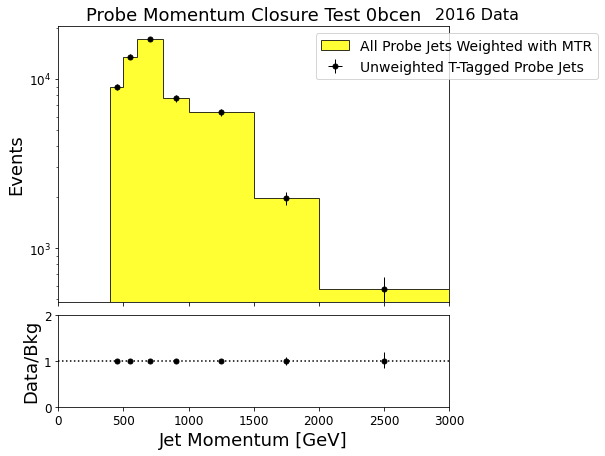

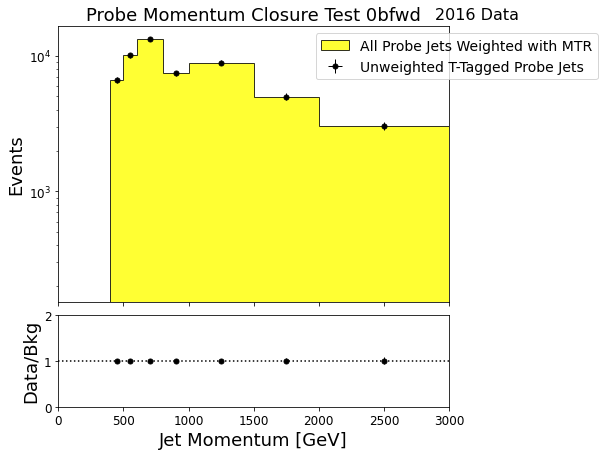

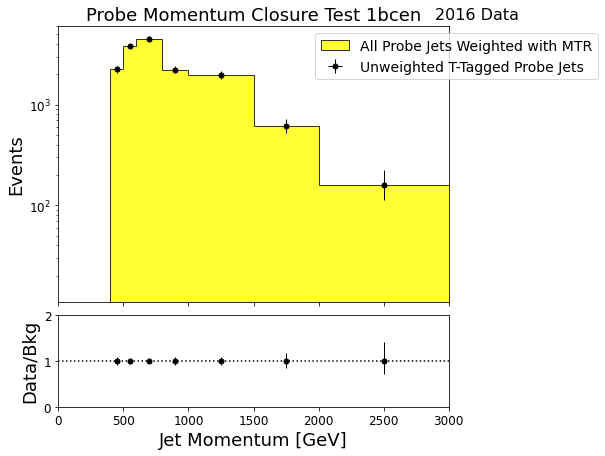

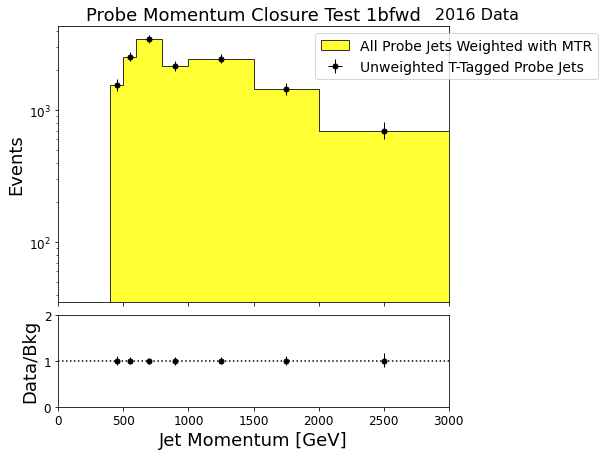

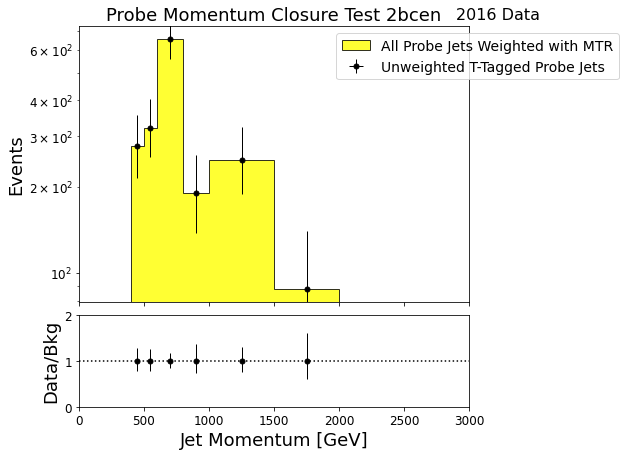

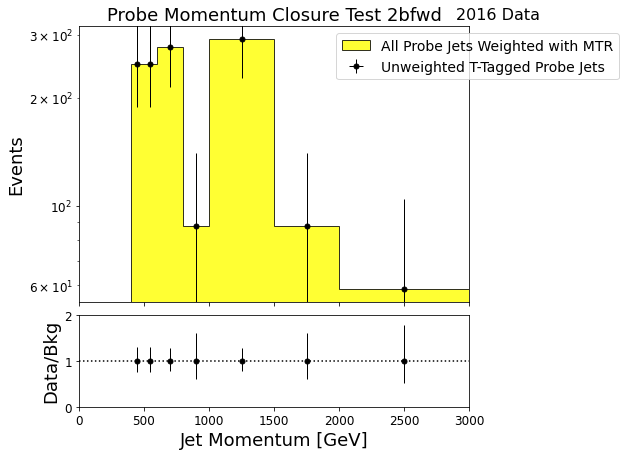

In [19]:
""" ---------- Comparing Background Estimate to unweighted Data ---------- """
SaveDirectory = maindirectory + '/' + 'ClosureTests' + '/' # split histograms into subdirectories
DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
for b_y in list_of_bcats:
    #---- Histogram Window Config. ----# 
    plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    fig, (ax, rax) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(7,7),
        gridspec_kw={"height_ratios": (3, 1)},
        sharex=True
    )
    fig.subplots_adjust(hspace=.07)
    #b_y = '0bcen' # b-tag category and rapidity window

    legend_labels = {'labels':['', 'All Probe Jets Weighted with MTR', 'T-Tagged Probe Jets'],
                             'loc': 'upper right',
                             'fontsize': 'x-small'}

    #---- Useful Information (Debug Purposes Only)----# 
    lut_file = maindirectory + '/LookupTables/mistag_JetHT2016_Data_at' + b_y + '.csv'
    df = pd.read_csv(lut_file)
    p_vals = df['p'] # Momentum (GeV)
    mtr = df['M(p)'].values # Mistag Rate
    MMR = mtr.sum()/mtr.size
    print('Mean Mistag Rate (MMR) = ', MMR)

    #---- Check if these two cutflows are the same ----#
    all_evts_unwgt = JetHT2016_unweighted['cutflow']['all events']
    all_evts_wgt = JetHT2016_weighted['cutflow']['all events']
    nevts = JetHT2016_unweighted['cutflow']['at'+b_y] # Anti-tag jet
    bkg_nevts = JetHT2016_weighted['cutflow']['at'+b_y] # (Anti-tag jets) x mtr
    exp_nevts = JetHT2016_unweighted['cutflow']['AT&Pt'+b_y] # Anti-tag and t-tagged Probe pairs
    
    print('All JetHT2016 unweighted events = ', all_evts_unwgt)
    print('All JetHT2016 weighted events = ', all_evts_wgt)
    if all_evts_unwgt != all_evts_wgt:
        printColorText('\n*NOTE* This test is not accurate', 'red')
    print()
    print('Number of Unweighted "at" Data (Cutflow) = ', nevts)
    print('Number of Weighted "at" Data (Cutflow) =   ', bkg_nevts)
    print('Number of Unweighted "Probet" Data (Cutflow) = ', exp_nevts)
    print()

    #---- Define Histogram categories of interest which should be equal ----# 
    hist_wgt_anacat = 'at' + b_y # category of interest for the weighted data (all weighted probe jets)
    hist_unwgt_anacat = 'AT&Pt' + b_y # category of interest for the un-weighted data (unweighted t-tagged probe jets)
    #---- Just for Comparison... ---#
    hist_unwgt_pretag_anacat = 'at' + b_y # (all unweighted probe jets)

    #---- Given pairs of jets where one jet is anti-tagged, show the momentum of the probe jets ----#
    hist_wgt = JetHT2016_weighted['probep'].integrate('anacat', hist_wgt_anacat).integrate('dataset', JetHT2016_unwgt_str[12:])
    hist_unwgt = JetHT2016_unweighted['probep'].integrate('anacat', hist_unwgt_anacat).integrate('dataset', JetHT2016_unwgt_str[12:])
    hist_unwgt_pretag = JetHT2016_unweighted['probep'].integrate('anacat', hist_unwgt_pretag_anacat).integrate('dataset', JetHT2016_unwgt_str[12:])

    # ---- Data Scaling ---- #
    hist_wgt.scale(Nevts2016_sf_wgt)
    hist_unwgt.scale(Nevts2016_sf) 
    hist_unwgt_pretag.scale(Nevts2016_sf)
    
    hist.plot1d(hist_wgt, ax=ax, clear=True,
                        fill_opts=stack_background_opts, error_opts=stack_error_opts) # all probe jets weighted with mistag rate (including tt contam. subtraction)
    hist.plot1d(hist_unwgt, ax=ax, clear=False,
                        error_opts=data_err_opts,
                        legend_opts=legend_labels) # all unweighted, t-tagged probe jets

    d = {'p': p_vals, 'M(p)': mtr, 
         'unwgt at'+b_y: hist_unwgt_pretag.values()[()], 
         'wgt at'+b_y: hist_wgt.values()[()], 
         'Probet'+b_y: hist_unwgt.values()[()]}
    df1 = pd.DataFrame(data=d)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
        print(df1)

    ax.set_yscale('log')
    ax.autoscale('y')
    ax.autoscale('x')#, tight=True) # doesn't look like its working...
    ax.set_ylabel('Events')
    ax.set_xlabel(None)
    ax.set_title('Probe Momentum Closure Test ' + b_y)
    leg = ax.legend(labels=[r'All Probe Jets Weighted with MTR', r'Unweighted T-Tagged Probe Jets'], bbox_to_anchor=(1.4, 1.), loc='upper right')

    #---- Plot Ratio ----#
    hist.plotratio(num = hist_unwgt, denom = hist_wgt, ax = rax,
                   error_opts=data_err_opts,
                   unc = 'num')
    rax.set_ylabel('Data/Bkg')
    rax.axhline(y=1, color='k', linestyle=':')
    rax.set_ylim(0,2)
    rax.set_xlim(0,3000)

    #---- Labeling ----#
    lumi = plt.text(1.18, 1.07, "2016 Data", #"?? fb$^{-1}$",
            fontsize=16,
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes
           )

    #filename = 'ClosureTest_2016_' + b_y + '.png'
    #plt.savefig(SaveDirectory+filename, bbox_inches="tight")
    #print('\n' + filename + ' saved')
    #print('\n ********************************************************')
    #print()

## Analysis Plots with Data Driven Background Estimate

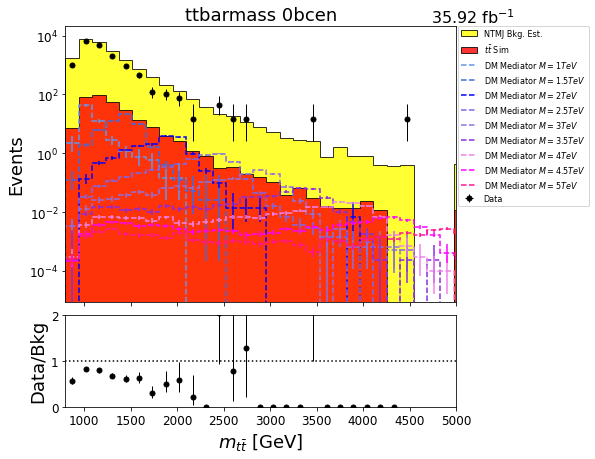

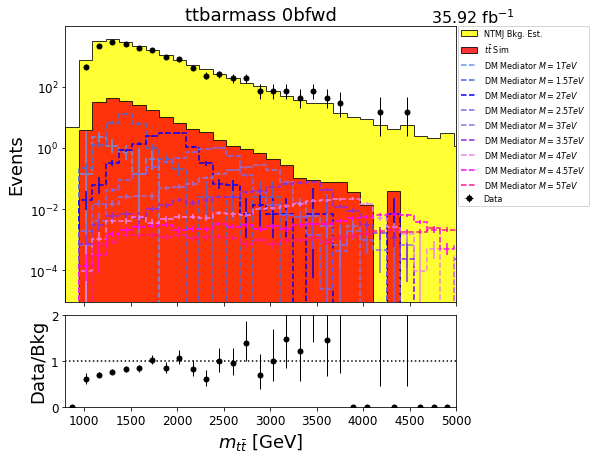

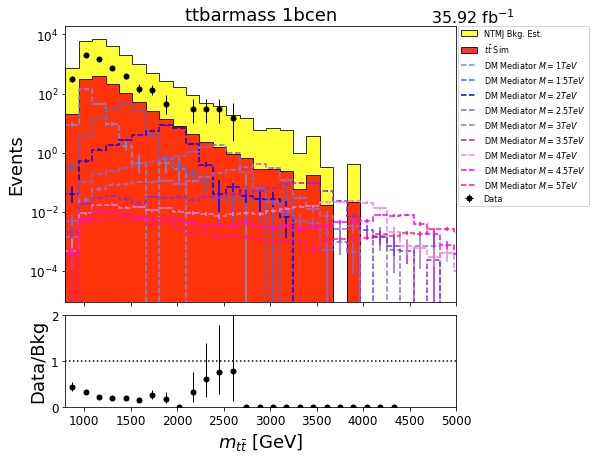

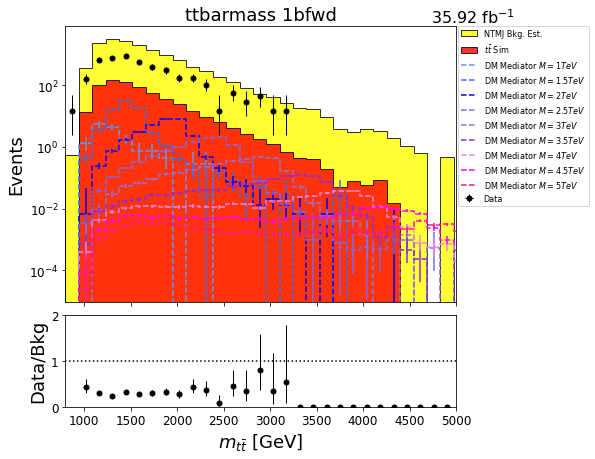

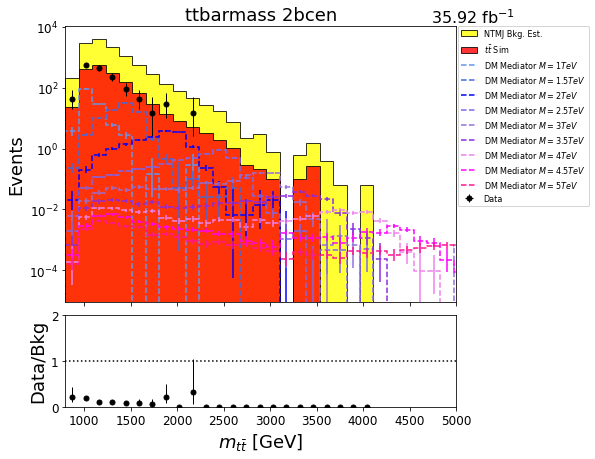

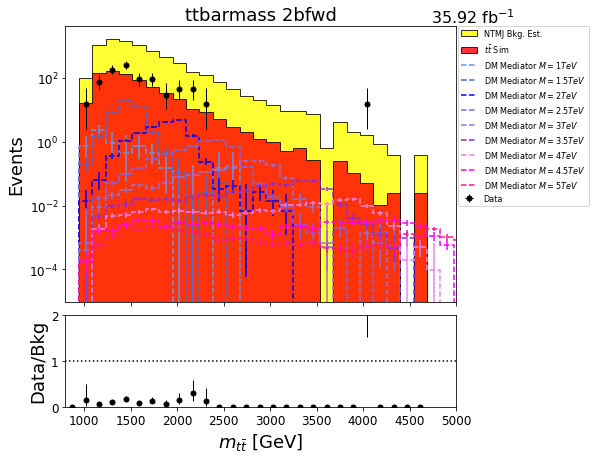

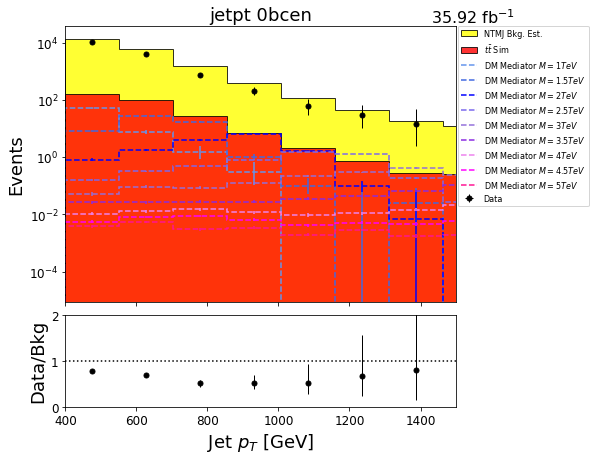

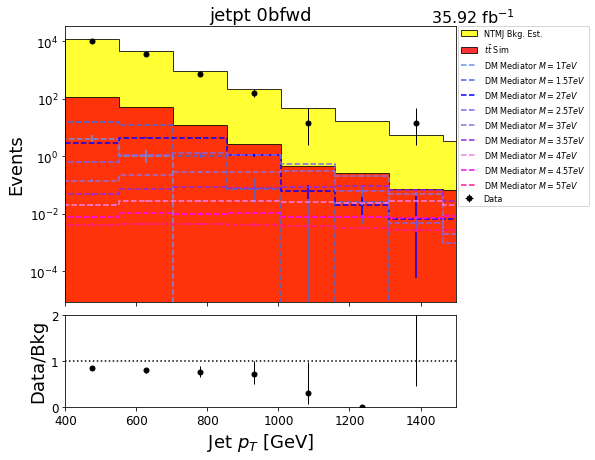

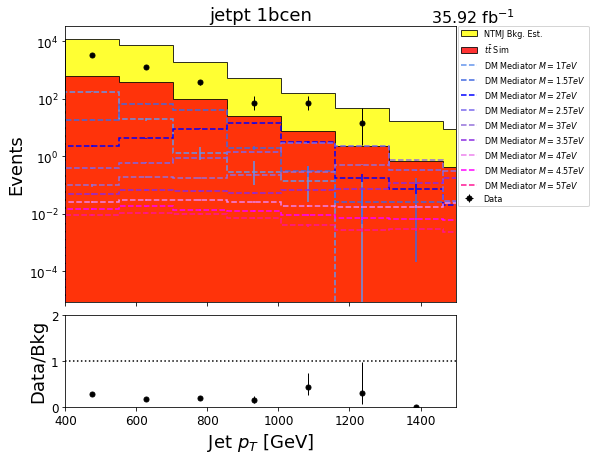

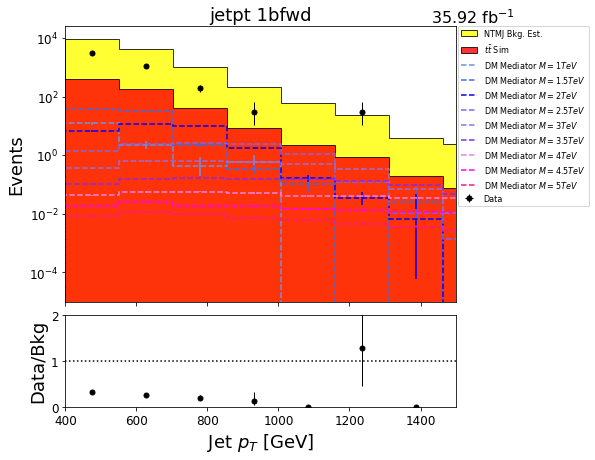

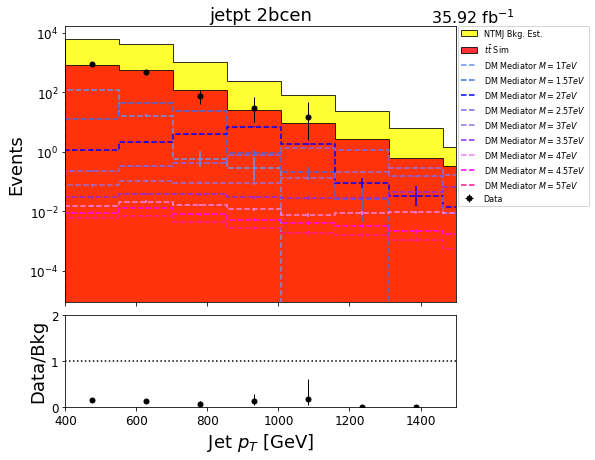

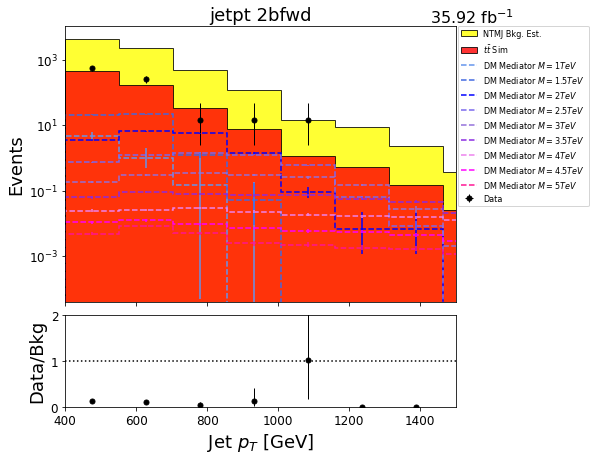

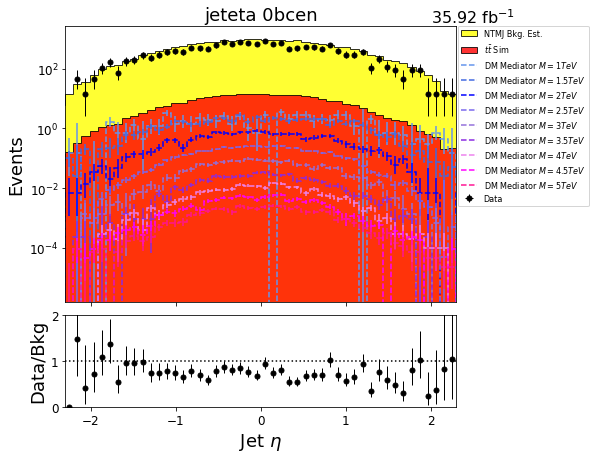

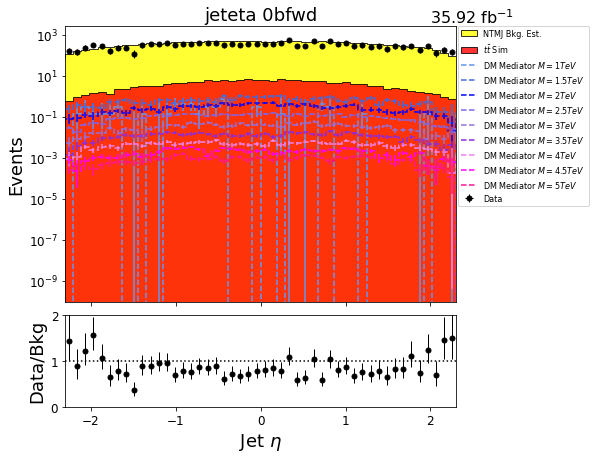

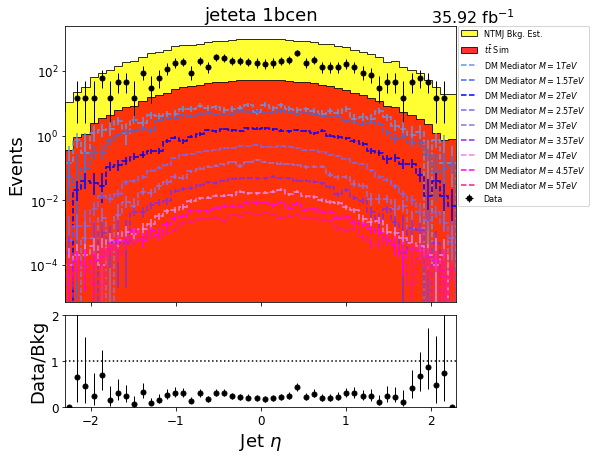

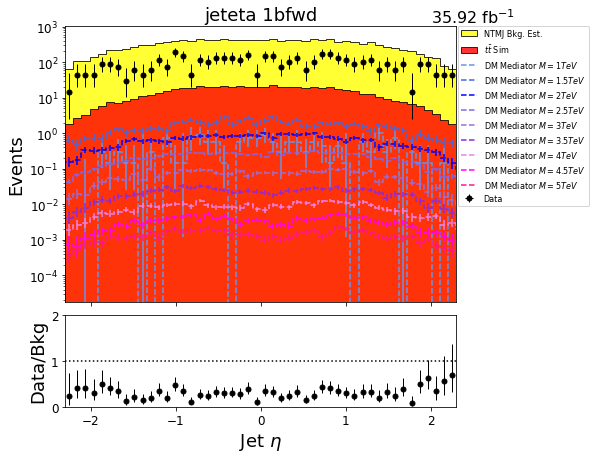

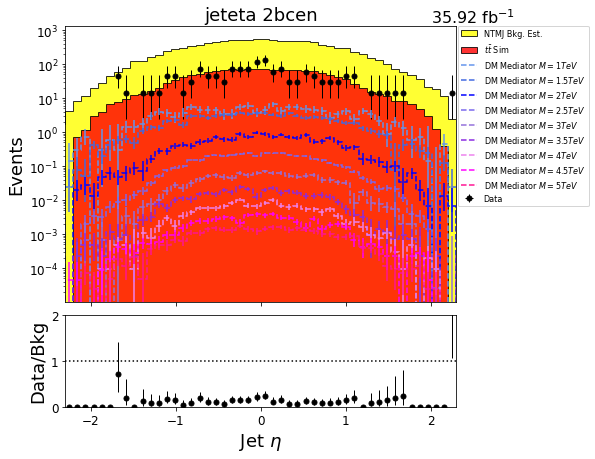

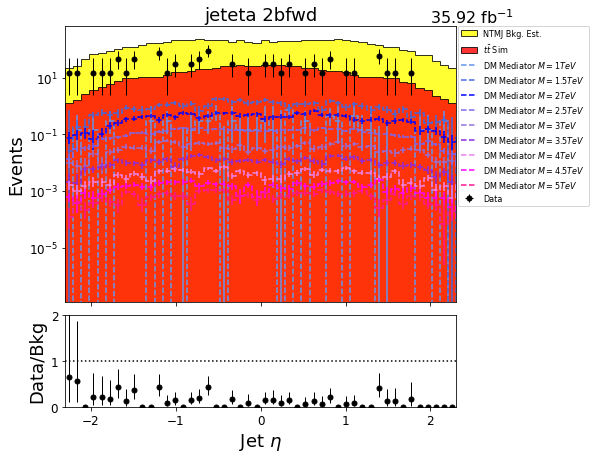

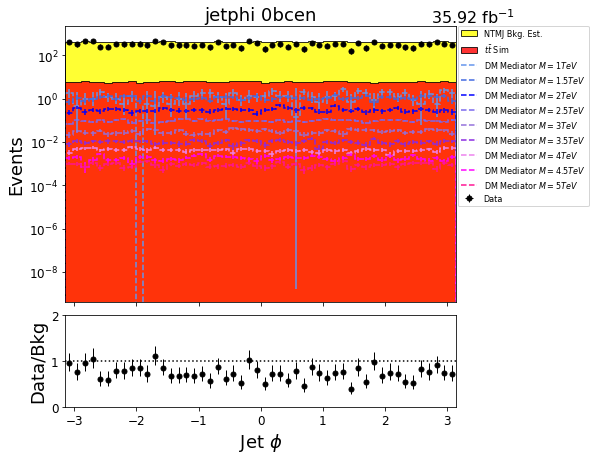

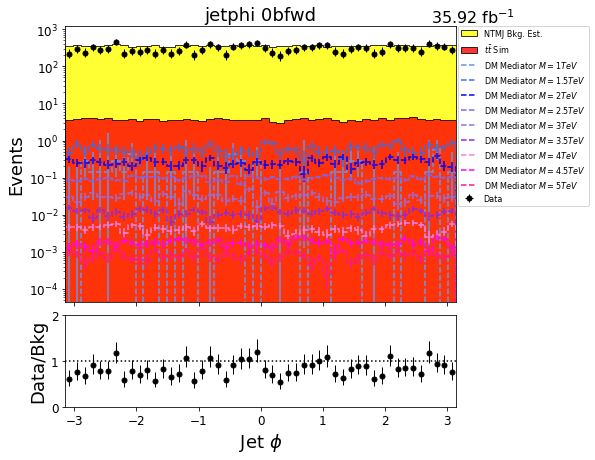

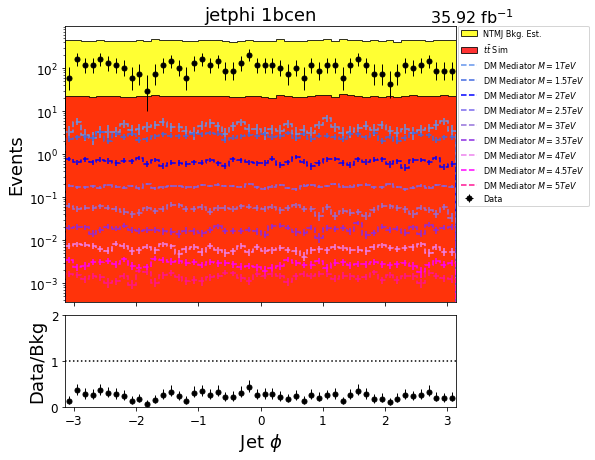

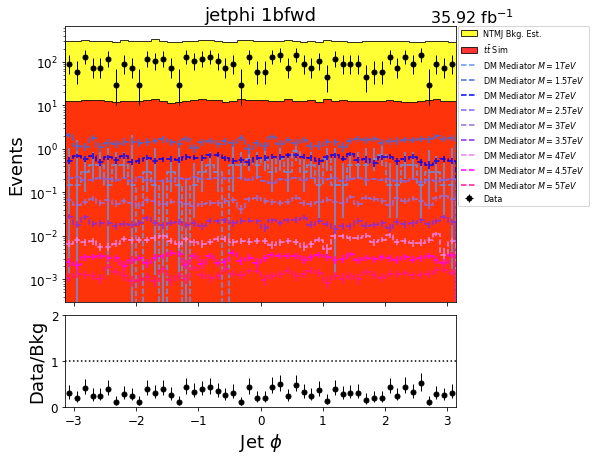

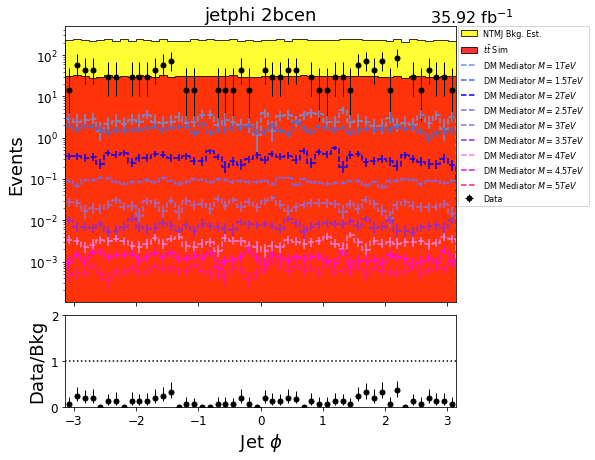

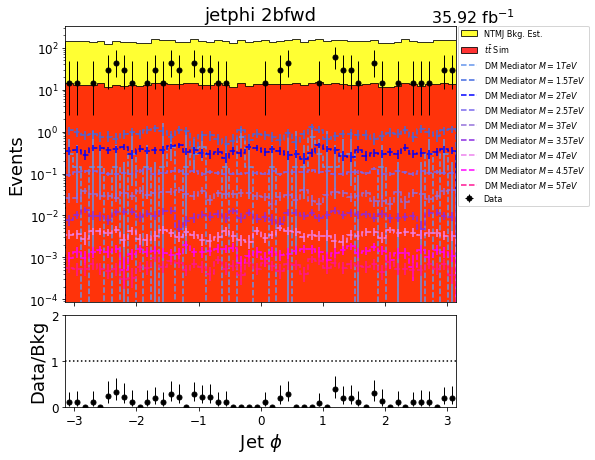

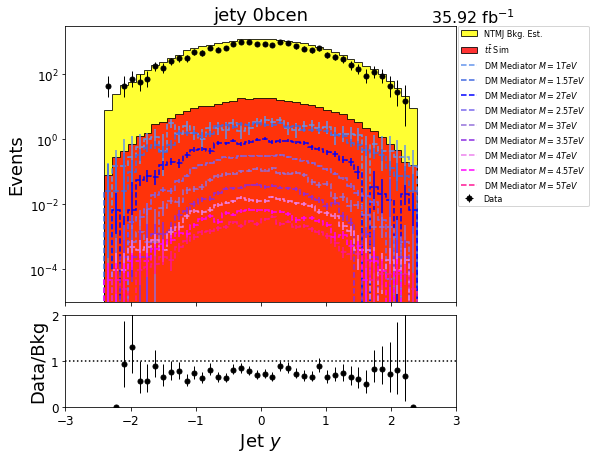

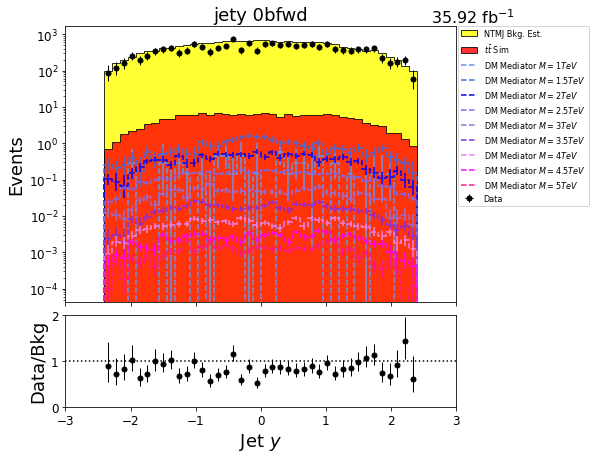

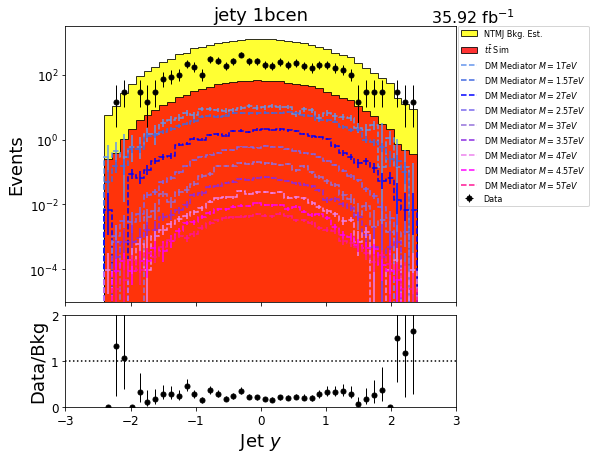

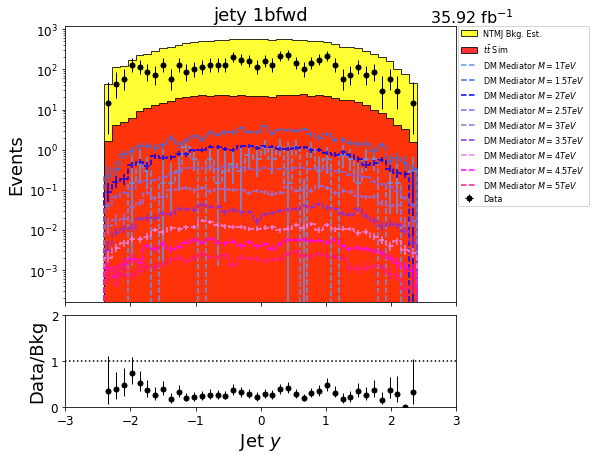

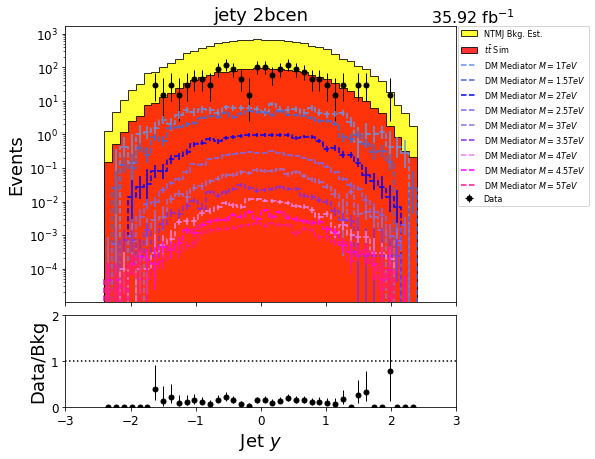

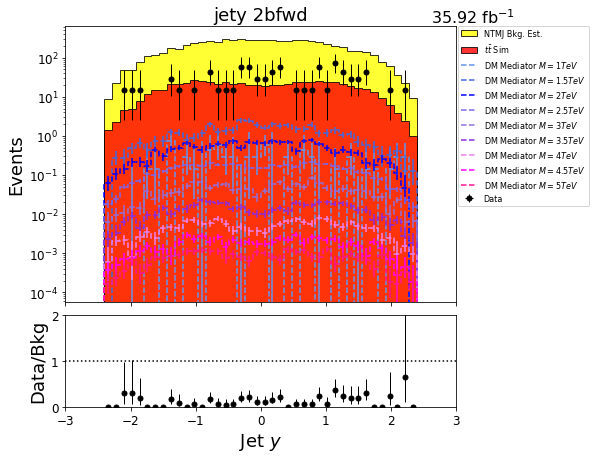

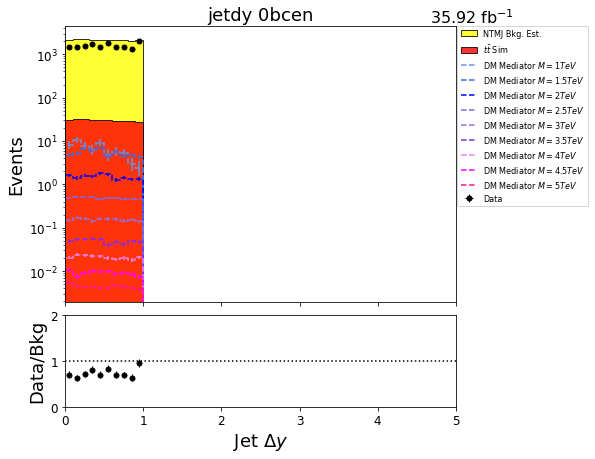

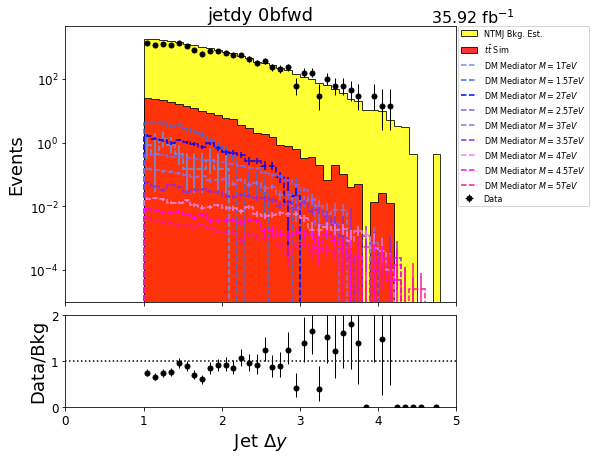

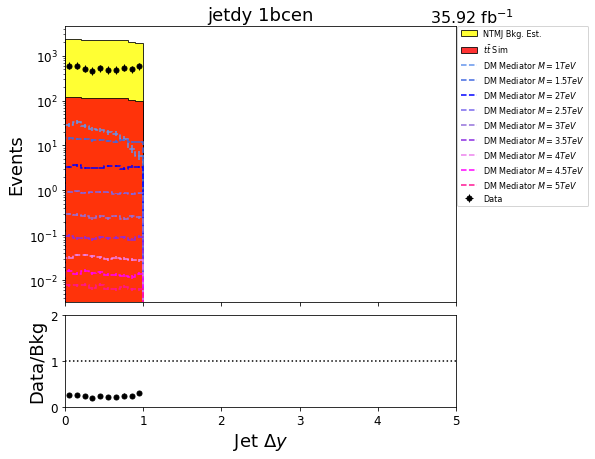

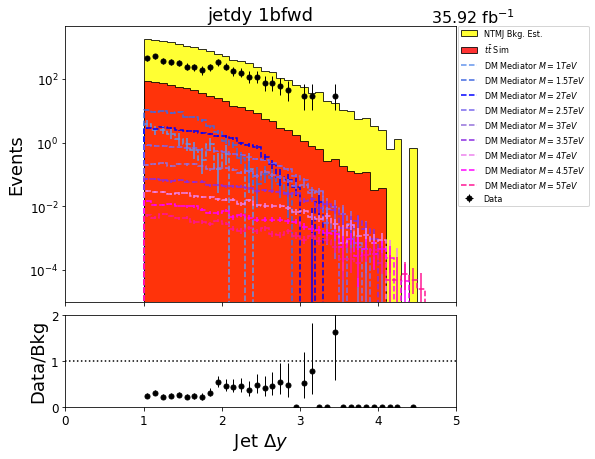

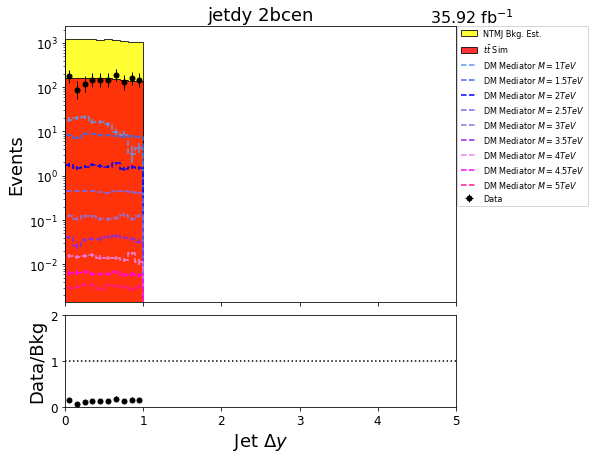

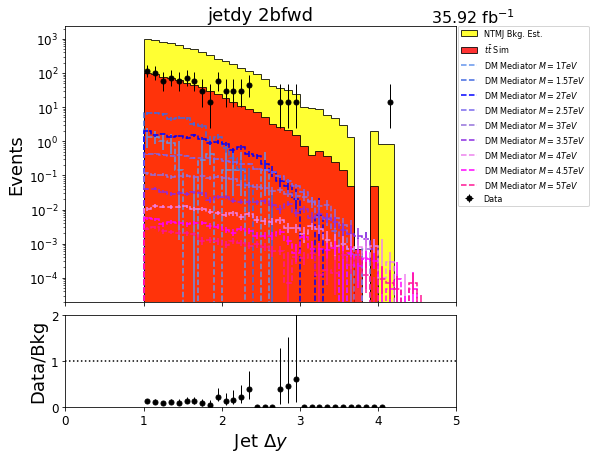

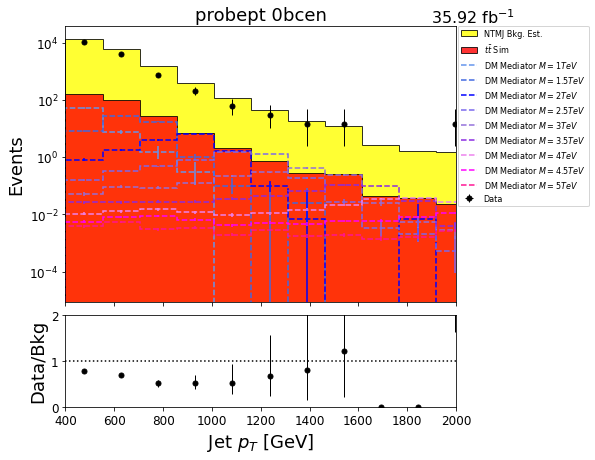

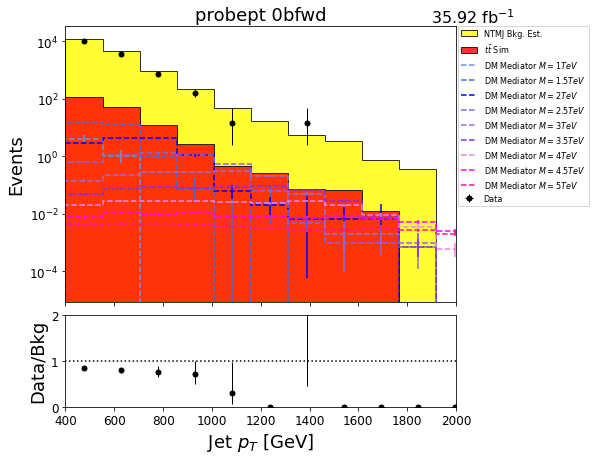

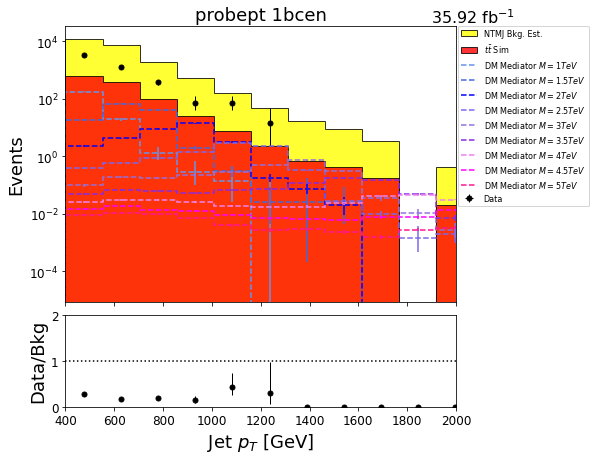

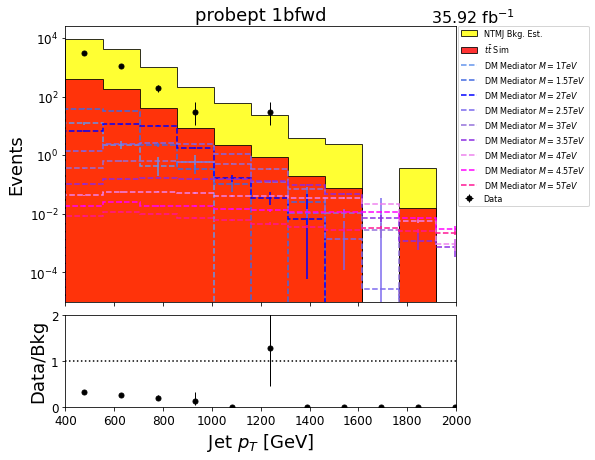

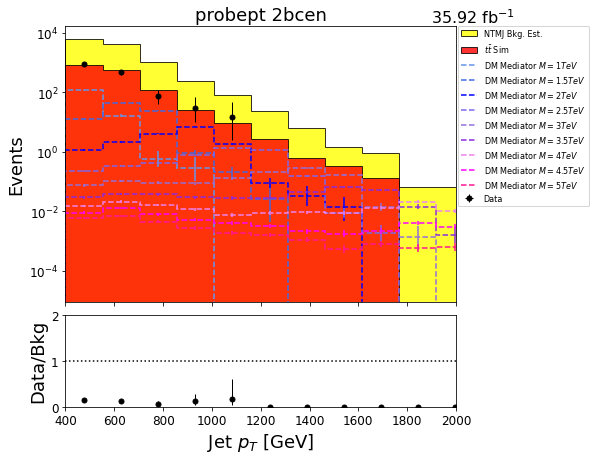

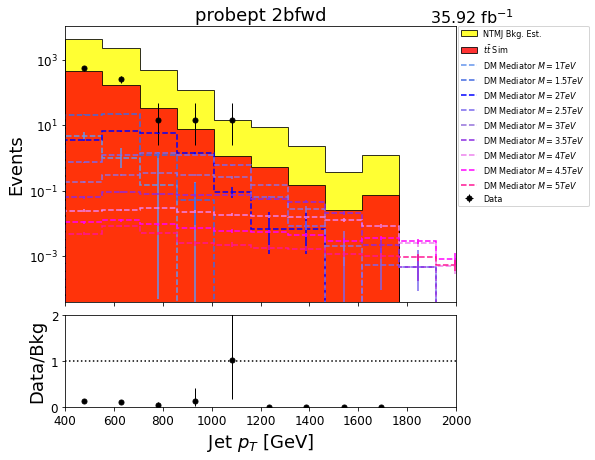

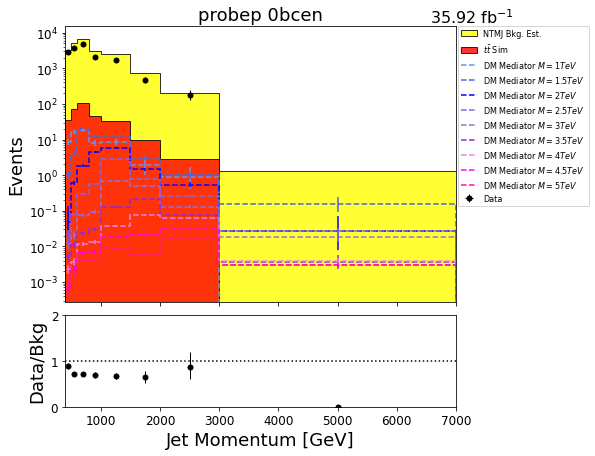

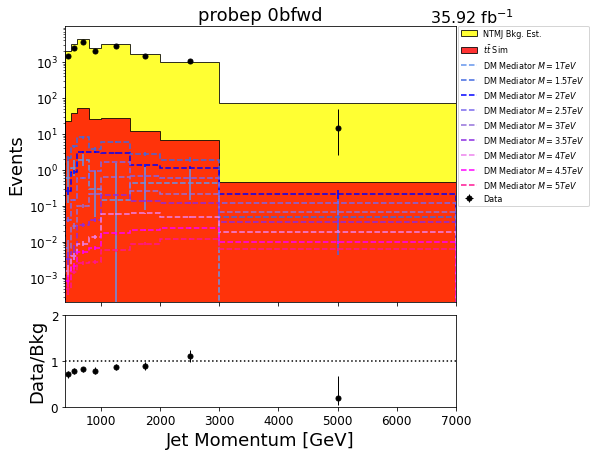

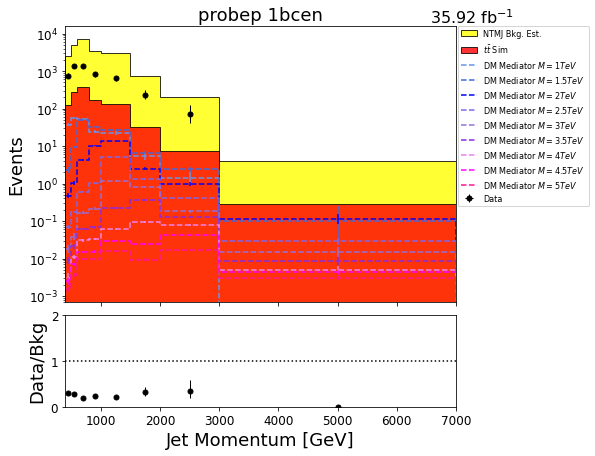

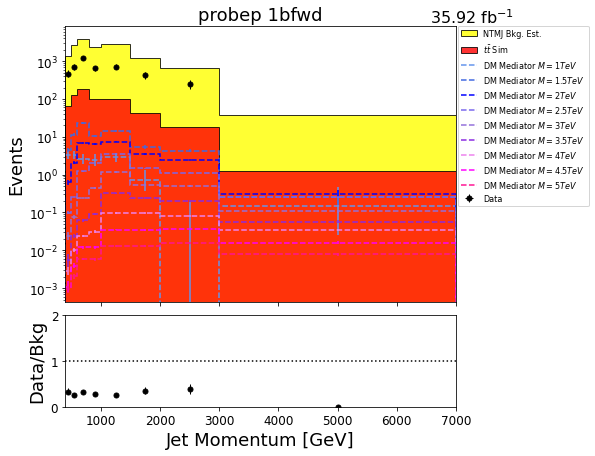

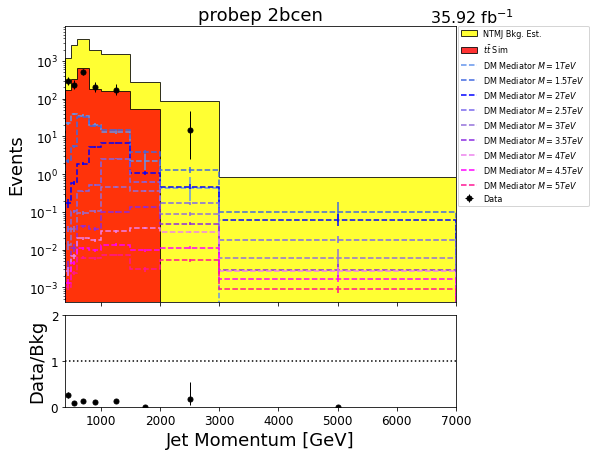

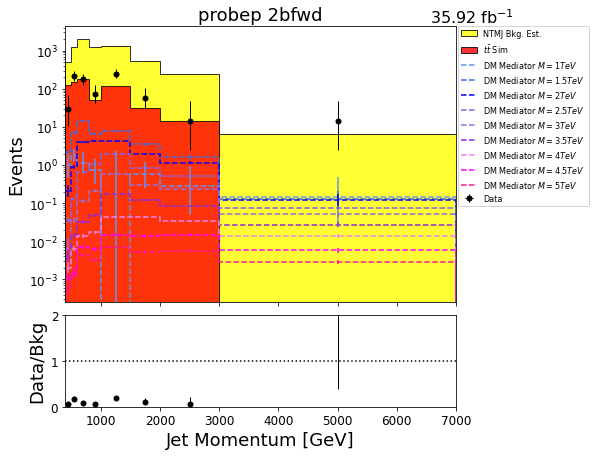

In [20]:
""" ---------- Comparing Background Estimate to Unweighted Data (One Histogram) ---------- """
""" --------------- Background: t tagged probe jet from data weighted by mistag --------------- """
""" --------------- Data: Unweighted Data from the Signal Region (2t tag region) -------------- """

# SaveDirectory = maindirectory + '/BkgEstimate/withRSGluonAndDM/' + btagDir + yearDir + APVDir # split histograms into subdirectories
SaveDirectory_temp = maindirectory + '/BkgEstimate/TemporaryDirectory/withDM/' + btagDir + yearDir + APVDir + UncDir + TopPtDir # split histograms into subdirectories
# SaveDirectoryRootFiles = maindirectory + '/BkgEstimate/RootFiles/' + btagDir + yearDir + APVDir # split histograms into subdirectories
DoesDirectoryExist(SaveDirectory_temp) # no need to create the directory several times if it exists already
# DoesDirectoryExist(SaveDirectoryRootFiles)

# root_WP   = btagDir[:-1]
# root_year = yearDir[:-1]
# root_APV  =  APVDir[:-1]
# root_Unc  = Unc + TopPt

# try:
#     root_output = uproot3.create(SaveDirectoryRootFiles + 'TTbarRes_0l_' + root_WP + root_year + root_APV + root_Unc + '.root')
# except OSError:
#     os.remove(SaveDirectoryRootFiles + 'TTbarRes_0l_' + root_WP + root_year + root_APV + root_Unc + '.root')
#     root_output = uproot3.create(SaveDirectoryRootFiles + 'TTbarRes_0l_' + root_WP + root_year + root_APV + root_Unc + '.root')

#---- list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep'))----#
for name in list_of_hists:
    for b_y in list_of_bcats:
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })
        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(7,7),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True
        )
        fig.subplots_adjust(hspace=.07)

        #---- Print cutflow of events (Debug Purposes Only)----#
        bkg_nevts = JetHT2016_weighted['cutflow']['pret'+b_y] 
        sig_nevts = JetHT2016_unweighted['cutflow']['2t'+b_y]
        # print("Background Estimate Region # of Entries = ~", bkg_nevts*Nevts2016_sf_wgt)
        # print("Signal Region # of Entries =              ~", sig_nevts*Nevts2016_sf)



        #---- Define Histograms from Coffea Outputs ----# 
        # -- For Observed Signal -- #
        Data_hist_unwgt = JetHT2016_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])

        # -- For Mass Modified Background Estimate (Non-Top Multi-Jets; NTMJ)-- #
        Data_hist_modmass_wgt = JetHT2016_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])

        # -- SM TTbar MC in Signal Region (Contributes to the Background) -- #
        TTbar_unwgt = TTbar_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])

        # -- Mistag Weighted TTbar MC (To Remove Double Counting of Untracked t-tagged J1 Events in Bkg.Est) -- #
        TTbar_2016_wgt = TTbar_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- Mistag Weighted TTbar MC -- #
        TTbar_2016_wgt_forplot = TTbar_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- MC RS KK Gluon Signals -- #
        RSGluon1000_wgt = RSGluon1000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon1000_unwgt_str[12:])
        RSGluon1500_wgt = RSGluon1500_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon1500_unwgt_str[12:])
        RSGluon2000_wgt = RSGluon2000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon2000_unwgt_str[12:])
        RSGluon2500_wgt = RSGluon2500_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon2500_unwgt_str[12:])
        RSGluon3000_wgt = RSGluon3000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon3000_unwgt_str[12:])
        RSGluon3500_wgt = RSGluon3500_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon3500_unwgt_str[12:])
        RSGluon4000_wgt = RSGluon4000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon4000_unwgt_str[12:])
        RSGluon4500_wgt = RSGluon4500_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon4500_unwgt_str[12:])
        RSGluon5000_wgt = RSGluon5000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', RSGluon5000_unwgt_str[12:])
        
        # -- MC DM Mediator Signals -- #
        DM1000_wgt = DM1000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM1000_unwgt_str[12:])
        DM1500_wgt = DM1500_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM1500_unwgt_str[12:])
        DM2000_wgt = DM2000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM2000_unwgt_str[12:])
        DM2500_wgt = DM2500_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM2500_unwgt_str[12:])
        DM3000_wgt = DM3000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM3000_unwgt_str[12:])
        DM3500_wgt = DM3500_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM3500_unwgt_str[12:])
        DM4000_wgt = DM4000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM4000_unwgt_str[12:])
        DM4500_wgt = DM4500_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM4500_unwgt_str[12:])
        DM5000_wgt = DM5000_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', DM5000_unwgt_str[12:])

        # =============================================================================================================================== #
        
        # ---- TTbar MC Scaling ---- #
        TTbar_unwgt.scale(ttbar2016_sf_xs_sumw2_wgt*toptag_kf) # Prepare to include this with background estimate
        TTbar_2016_wgt_forplot.scale(ttbar2016_sf_xs_sumw2_wgt*toptag_kf)
        TTbar_2016_wgt.scale(-ttbar2016_sf_xs_sumw2_wgt*toptag_kf) # Prepare to subtract this from background to correct for ttbar contamination

        # ---- Data Scaling ---- #
        Data_hist_unwgt.scale(Nevts2016_sf) # Observed Signal is only scaled up to Luminosity
        Data_hist_modmass_wgt.scale(Nevts2016_sf_wgt)

        Data_hist_modmass_wgt.add(TTbar_unwgt) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        Data_hist_modmass_wgt.add(TTbar_2016_wgt) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        
        # ---- MC Signals Scaling ---- #
        RSGluon1000_wgt.scale(RSGluon1000_2016_sf_wgt)
        RSGluon1500_wgt.scale(RSGluon1500_2016_sf_wgt)
        RSGluon2000_wgt.scale(RSGluon2000_2016_sf_wgt)
        RSGluon2500_wgt.scale(RSGluon2500_2016_sf_wgt)
        RSGluon3000_wgt.scale(RSGluon3000_2016_sf_wgt)
        RSGluon3500_wgt.scale(RSGluon3500_2016_sf_wgt)
        RSGluon4000_wgt.scale(RSGluon4000_2016_sf_wgt)
        RSGluon4500_wgt.scale(RSGluon4500_2016_sf_wgt)
        RSGluon5000_wgt.scale(RSGluon5000_2016_sf_wgt)
        
        DM1000_wgt.scale(DM1000_2016_sf_wgt)
        DM1500_wgt.scale(DM1500_2016_sf_wgt)
        DM2000_wgt.scale(DM2000_2016_sf_wgt)
        DM2500_wgt.scale(DM2500_2016_sf_wgt)
        DM3000_wgt.scale(DM3000_2016_sf_wgt)
        DM3500_wgt.scale(DM3500_2016_sf_wgt)
        DM4000_wgt.scale(DM4000_2016_sf_wgt)
        DM4500_wgt.scale(DM4500_2016_sf_wgt)
        DM5000_wgt.scale(DM5000_2016_sf_wgt)

        # =============================================================================================================================== #

        # ---- Background and Observed Signal for Histograms Compared with MC Signals ---- #

        # -- J0 t-tagged and weighted, J1 Mass Modified, SM ttbar included, J1 t-tagged double counts removed -- #
        Background_ModMass_Corrected = Data_hist_modmass_wgt 

        # -- Simple Observed Data in Signal Region -- #
        Observed = Data_hist_unwgt 

        # ---- Legend Lables for Plotting with no MC Signals ---- #
        # legend_labels = {'labels':[r'NTMJ Bkg. Est.', r'$t\bar{t}$ Sim', 
        #                            r'Data'], 
        #                  'ncol':1, 
        #                  'loc': 'upper right', 'bbox_to_anchor': (1.0, 1.0),
        #                  'fontsize': 'xx-small'}
        
        # ---- Legend Lables for Plotting with All RS KK Gluon Signals ---- #
        # legend_labels = {'labels':[r'NTMJ Bkg. Est.', r'$t\bar{t}$ Sim', 
        #                            r'$RS_{KK}$ Gluon $M=1TeV$', r'$RS_{KK}$ Gluon $M=1.5TeV$', r'$RS_{KK}$ Gluon $M=2TeV$', r'$RS_{KK}$ Gluon $M=2.5TeV$',
        #                            r'$RS_{KK}$ Gluon $M=3TeV$', r'$RS_{KK}$ Gluon $M=3.5TeV$', r'$RS_{KK}$ Gluon $M=4TeV$', r'$RS_{KK}$ Gluon $M=4.5TeV$',
        #                            r'$RS_{KK}$ Gluon $M=5TeV$',
        #                            r'Data'], 
        #                  'ncol':1, 
        #                  'loc': 'upper right', 'bbox_to_anchor': (1.33, 1.017),
        #                  'fontsize': 'xx-small'}
        
        # ---- Legend Lables for Plotting with All DM Mediator Signals ---- #
        legend_labels = {'labels':[r'NTMJ Bkg. Est.', r'$t\bar{t}$ Sim', 
                                   r'DM Mediator $M=1TeV$', r'DM Mediator $M=1.5TeV$', r'DM Mediator $M=2TeV$', r'DM Mediator $M=2.5TeV$',
                                   r'DM Mediator $M=3TeV$', r'DM Mediator $M=3.5TeV$', r'DM Mediator $M=4TeV$', r'DM Mediator $M=4.5TeV$',
                                   r'DM Mediator $M=5TeV$',
                                   r'Data'], 
                         'ncol':1, 
                         'loc': 'upper right', 'bbox_to_anchor': (1.35, 1.017),
                         'fontsize': 'xx-small'}
        
        # ---- Legend Lables for Plotting with All RS KK Gluon and DM Mediator Signals ---- #
        # legend_labels = {'labels':[r'NTMJ Bkg. Est.', r'$t\bar{t}$ Sim', 
        #                            r'$RS_{KK}$ Gluon $M=1TeV$', r'$RS_{KK}$ Gluon $M=1.5TeV$', r'$RS_{KK}$ Gluon $M=2TeV$', r'$RS_{KK}$ Gluon $M=2.5TeV$',
        #                            r'$RS_{KK}$ Gluon $M=3TeV$', r'$RS_{KK}$ Gluon $M=3.5TeV$', r'$RS_{KK}$ Gluon $M=4TeV$', r'$RS_{KK}$ Gluon $M=4.5TeV$',
        #                            r'$RS_{KK}$ Gluon $M=5TeV$',
        #                            r'DM Mediator $M=1TeV$', r'DM Mediator $M=1.5TeV$', r'DM Mediator $M=2TeV$', r'DM Mediator $M=2.5TeV$',
        #                            r'DM Mediator $M=3TeV$', r'DM Mediator $M=3.5TeV$', r'DM Mediator $M=4TeV$', r'DM Mediator $M=4.5TeV$',
        #                            r'DM Mediator $M=5TeV$',
        #                            r'Data'], 
        #                  'ncol':1, 
        #                  'loc': 'upper right', 'bbox_to_anchor': (1.35, 1.017),
        #                  'fontsize': 'xx-small'}
        
        # # ---- Shrink current axis by 10% ---- 3
        # box = ax.get_position()
        # ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])

        # ---- Plot Histograms (Comment out whatever you don't want included in the figure and/or root file) ---- #
        ObservedPlot = hist.plot1d(Observed, ax=ax, clear=True,
                     error_opts=data_err_opts)
        BackgroundPlot = hist.plot1d(Background_ModMass_Corrected, ax=ax, clear=False,
                    fill_opts=stack_background_opts,
                    error_opts=stack_error_opts)
        TTbarPlot = hist.plot1d(TTbar_2016_wgt_forplot, ax=ax, clear=False,
                    fill_opts=stack_ttbar_opts,
                    error_opts=stack_error_opts)#, legend_opts=legend_labels)
        
        # RSGluon1000Plot = hist.plot1d(RSGluon1000_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg1000_opts,
        #             error_opts=stack_error_opts)
        # RSGluon1500Plot = hist.plot1d(RSGluon1500_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg1500_opts,
        #             error_opts=stack_error_opts)
        # RSGluon2000Plot = hist.plot1d(RSGluon2000_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg2000_opts,
        #             error_opts=stack_error_opts)
        # RSGluon2500Plot = hist.plot1d(RSGluon2500_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg2500_opts,
        #             error_opts=stack_error_opts)
        # RSGluon3000Plot = hist.plot1d(RSGluon3000_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg3000_opts,
        #             error_opts=stack_error_opts)
        # RSGluon3500Plot = hist.plot1d(RSGluon3500_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg3500_opts,
        #             error_opts=stack_error_opts)
        # RSGluon4000Plot = hist.plot1d(RSGluon4000_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg4000_opts,
        #             error_opts=stack_error_opts)
        # RSGluon4500Plot = hist.plot1d(RSGluon4500_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg4500_opts,
        #             error_opts=stack_error_opts)
        # RSGluon5000Plot = hist.plot1d(RSGluon5000_wgt, ax=ax, clear=False,
        #             line_opts=line_rsg5000_opts,
        #             error_opts=stack_error_opts, legend_opts=legend_labels)
        
        DM1000Plot = hist.plot1d(DM1000_wgt, ax=ax, clear=False,
                    line_opts=line_dm1000_opts,
                    error_opts=stack_error_opts)
        DM1500Plot = hist.plot1d(DM1500_wgt, ax=ax, clear=False,
                    line_opts=line_dm1500_opts,
                    error_opts=stack_error_opts)
        DM2000Plot = hist.plot1d(DM2000_wgt, ax=ax, clear=False,
                    line_opts=line_dm2000_opts,
                    error_opts=stack_error_opts)
        DM2500Plot = hist.plot1d(DM2500_wgt, ax=ax, clear=False,
                    line_opts=line_dm2500_opts,
                    error_opts=stack_error_opts)
        DM3000Plot = hist.plot1d(DM3000_wgt, ax=ax, clear=False,
                    line_opts=line_dm3000_opts,
                    error_opts=stack_error_opts)
        DM3500Plot = hist.plot1d(DM3500_wgt, ax=ax, clear=False,
                    line_opts=line_dm3500_opts,
                    error_opts=stack_error_opts)
        DM4000Plot = hist.plot1d(DM4000_wgt, ax=ax, clear=False,
                    line_opts=line_dm4000_opts,
                    error_opts=stack_error_opts)
        DM4500Plot = hist.plot1d(DM4500_wgt, ax=ax, clear=False,
                    line_opts=line_dm4500_opts,
                    error_opts=stack_error_opts)
        DM5000Plot = hist.plot1d(DM5000_wgt, ax=ax, clear=False,
                    line_opts=line_dm5000_opts,
                    error_opts=stack_error_opts, legend_opts=legend_labels)
        
        # root_output['Data_' + b_y + '_' + name] = hist.export1d(Observed)
        # root_output['BkgEst_' + b_y + '_' + name] = hist.export1d(Background_ModMass_Corrected)
        # root_output['TTbar_' + b_y + '_' + name] = hist.export1d(TTbar_unwgt)
        # root_output['RSGluon1000_' + b_y + '_' + name] = hist.export1d(RSGluon1000_wgt)
        # root_output['RSGluon1500_' + b_y + '_' + name] = hist.export1d(RSGluon1500_wgt)
        # root_output['RSGluon2000_' + b_y + '_' + name] = hist.export1d(RSGluon2000_wgt)
        # root_output['RSGluon2500_' + b_y + '_' + name] = hist.export1d(RSGluon2500_wgt)
        # root_output['RSGluon3000_' + b_y + '_' + name] = hist.export1d(RSGluon3000_wgt)
        # root_output['RSGluon3500_' + b_y + '_' + name] = hist.export1d(RSGluon3500_wgt)
        # root_output['RSGluon4000_' + b_y + '_' + name] = hist.export1d(RSGluon4000_wgt)
        # root_output['RSGluon4500_' + b_y + '_' + name] = hist.export1d(RSGluon4500_wgt)
        # root_output['RSGluon5000_' + b_y + '_' + name] = hist.export1d(RSGluon5000_wgt)
        # root_output['DM1000_' + b_y + '_' + name] = hist.export1d(DM1000_wgt)
        # root_output['DM1500_' + b_y + '_' + name] = hist.export1d(DM1500_wgt)
        # root_output['DM2000_' + b_y + '_' + name] = hist.export1d(DM2000_wgt)
        # root_output['DM2500_' + b_y + '_' + name] = hist.export1d(DM2500_wgt)
        # root_output['DM3000_' + b_y + '_' + name] = hist.export1d(DM3000_wgt)
        # root_output['DM3500_' + b_y + '_' + name] = hist.export1d(DM3500_wgt)
        # root_output['DM4000_' + b_y + '_' + name] = hist.export1d(DM4000_wgt)
        # root_output['DM4500_' + b_y + '_' + name] = hist.export1d(DM4500_wgt)
        # root_output['DM5000_' + b_y + '_' + name] = hist.export1d(DM5000_wgt)


        plt.ylim(bottom = .1, top = 10**4)

        ax.set_yscale('log')
        ax.autoscale('y')
        ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        ax.set_xlabel(None)
        ax.set_title(name + ' ' + b_y)

        #---- Plot Ratio ----#
        RatioPlot = hist.plotratio(num = Observed, denom = Background_ModMass_Corrected, ax = rax,
                       error_opts={'marker': '.', 'markersize': 10., 'color': 'k', 'elinewidth': 1},
                       unc = 'num')
        rax.set_ylabel('Data/Bkg')
        rax.axhline(y=1, color='k', linestyle=':')
        rax.set_ylim(0,2)
        if 'ttbarmass' in name:
            rax.set_xlim(800,5000)
        elif 'jetpt' in name:
            rax.set_xlim(400,1500)
        elif 'jeteta' in name:
            rax.set_xlim(-2.3,2.3)
        elif 'jetphi' in name:
            rax.set_xlim(-3.14, 3.14)
        elif 'jety' in name:
            rax.set_xlim(-3., 3.)
        elif 'jetdy' in name:
            rax.set_xlim(0., 5.)
        elif 'probept' in name:
            rax.set_xlim(400., 2000.)   
        elif 'probep' in name:
            rax.set_xlim(400., 7000.)  
        
        #rax.set_xlim(0,500)

        #---- Labeling ----#
        Lint = str(Lum2016*.001) # Integrated Luminosity
        lumi = plt.text(1.15, 1.07, Lint[:6] + " fb$^{-1}$",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )

        # filename = 'BkgEst_' + name + '_ContaminationCorrection_ModMass' + Unc + TopPt + '_' + b_y + '.png'
        filename_temp = 'BkgEst_' + name + '_ContaminationCorrection_ModMass' + Unc + TopPt + '_' + b_y + '.png'
        # plt.savefig(SaveDirectory_temp+filename_temp, bbox_inches="tight")
        # print('\n' + SaveDirectory + filename)
# root_output.close()

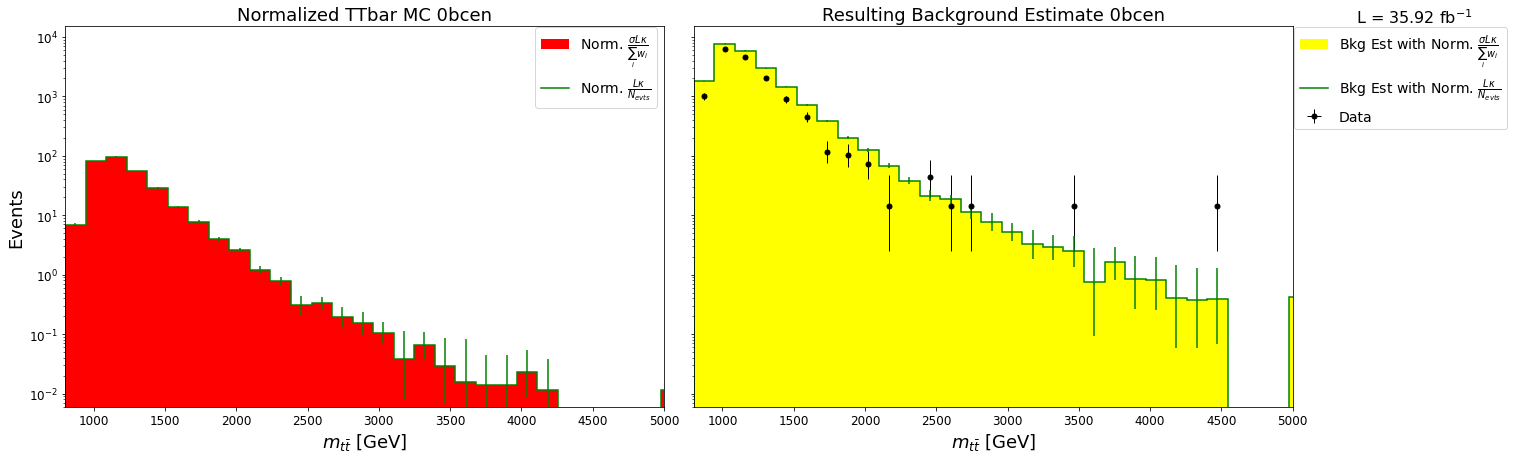

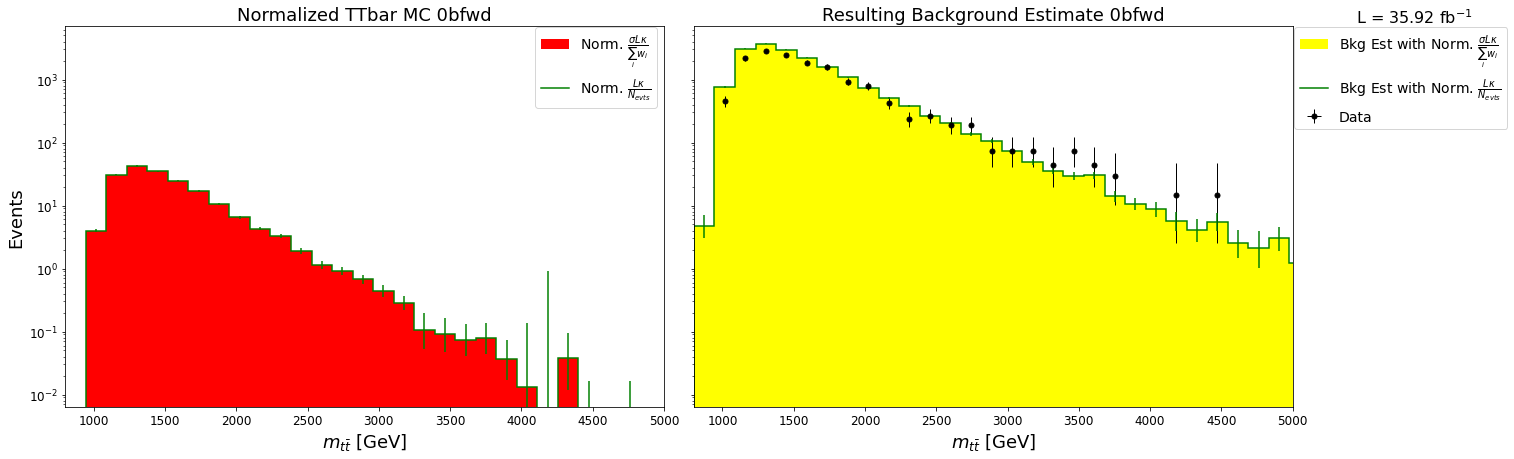

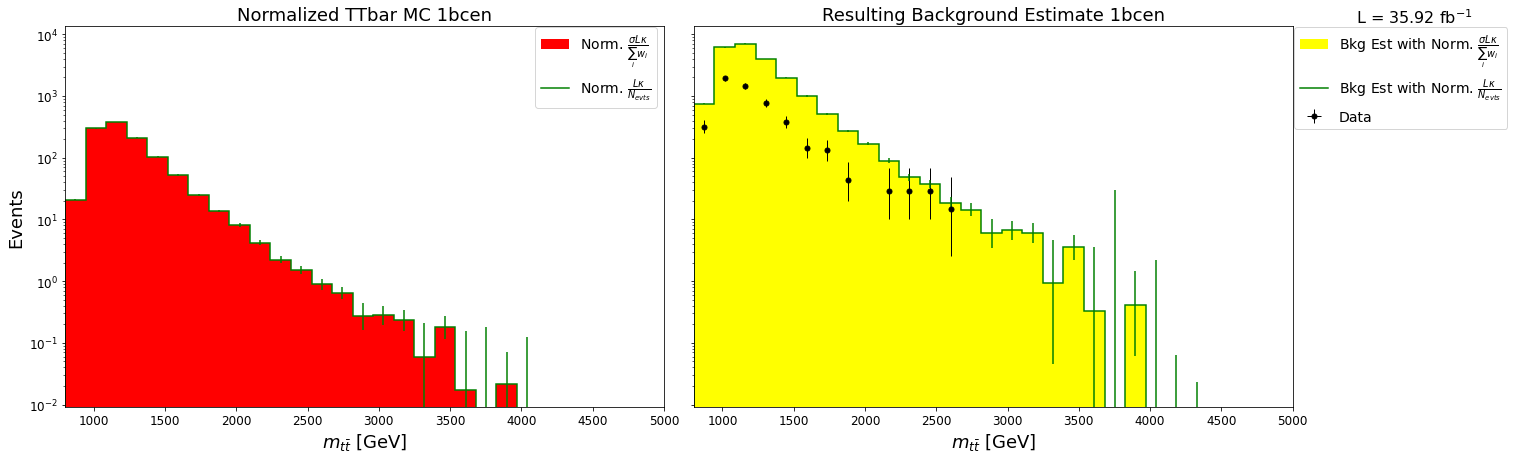

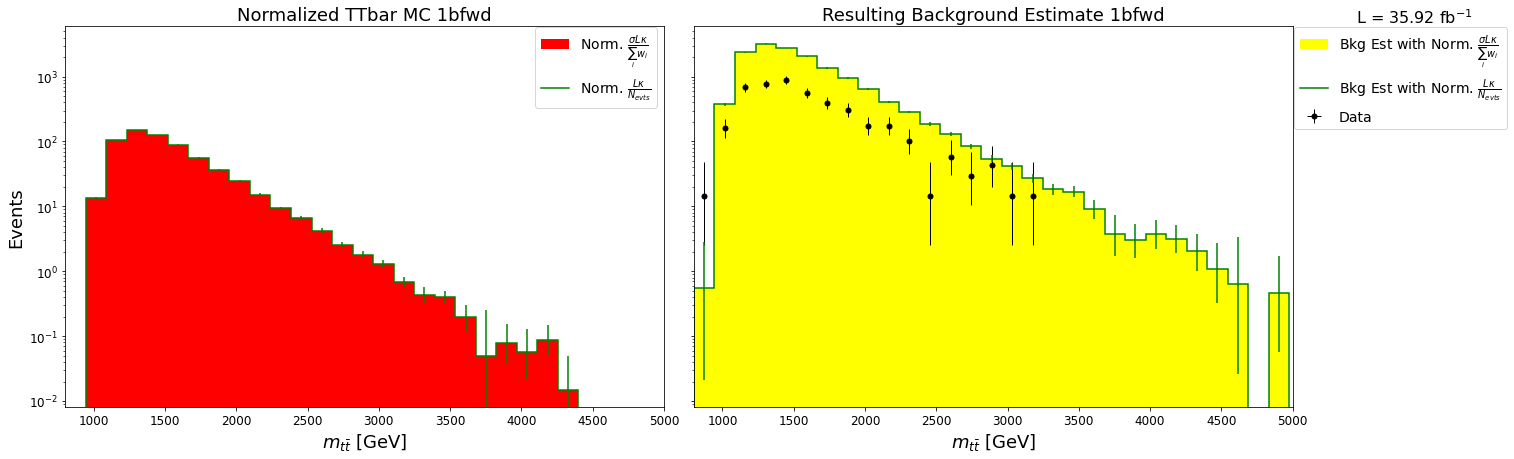

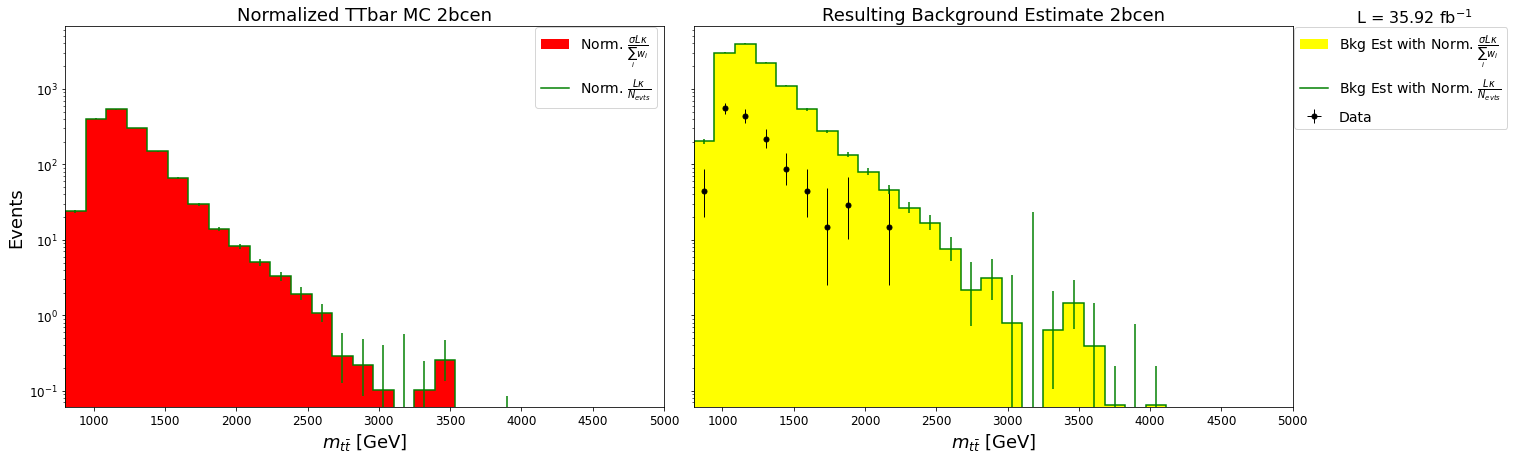

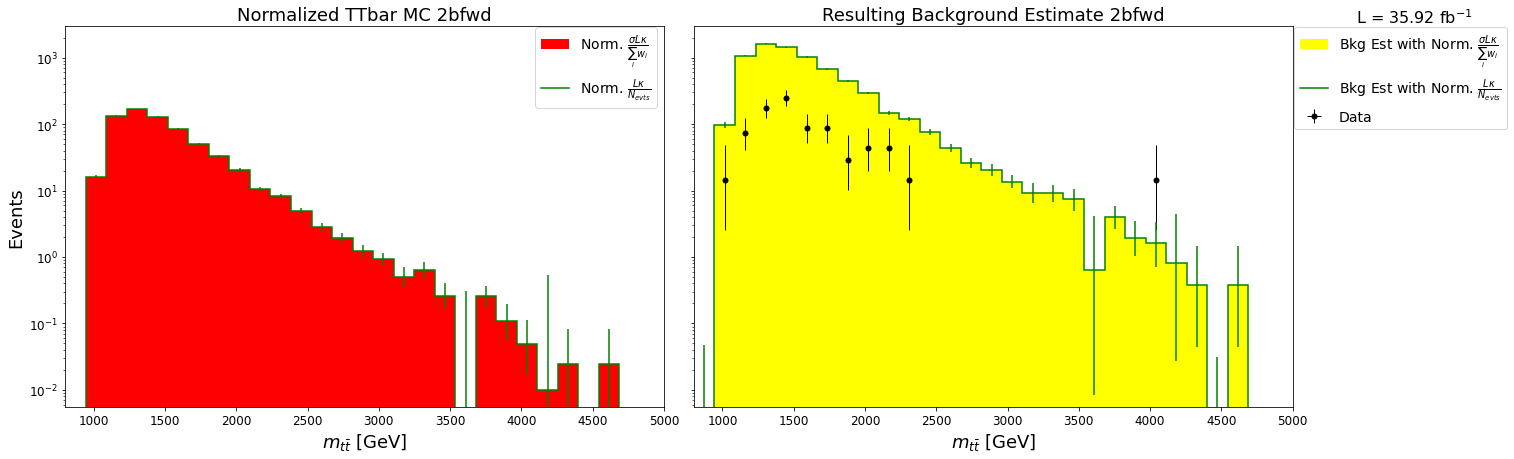

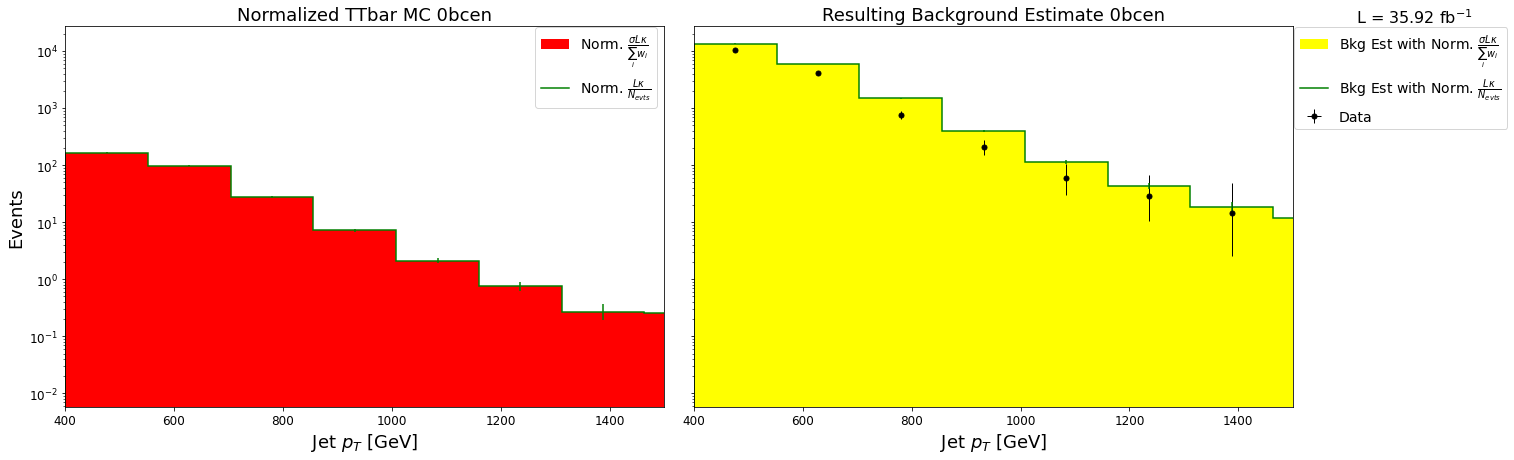

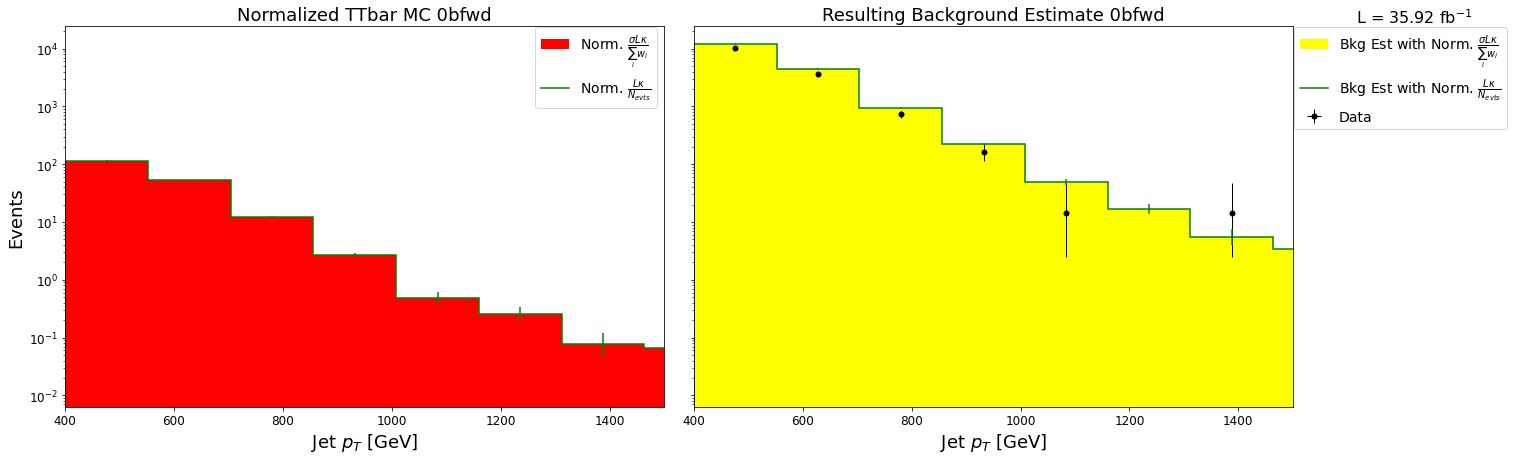

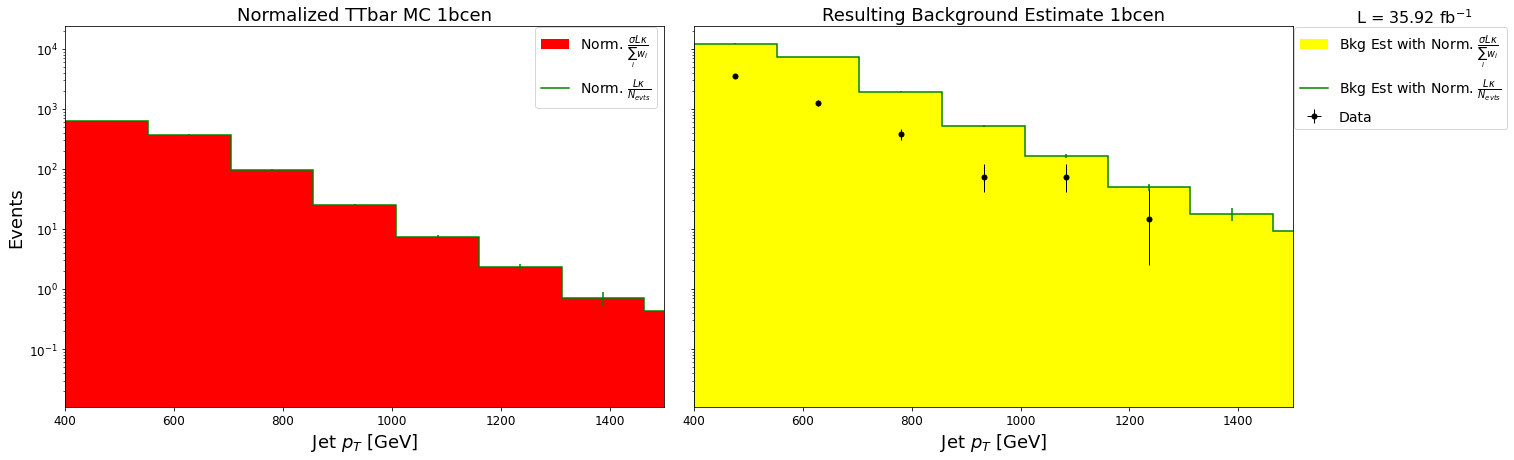

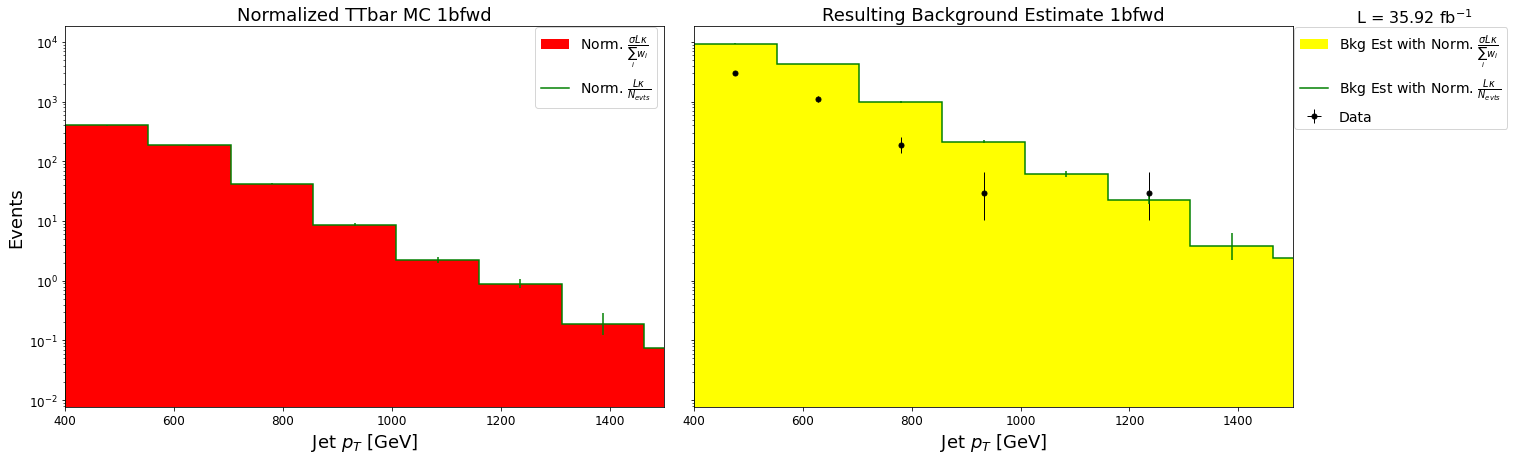

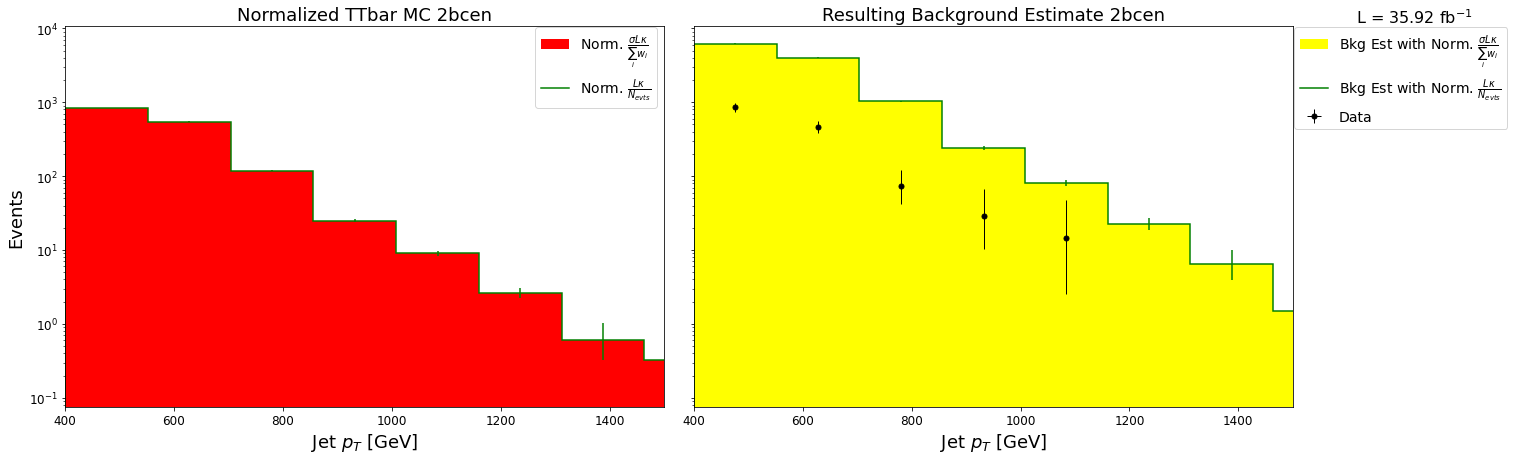

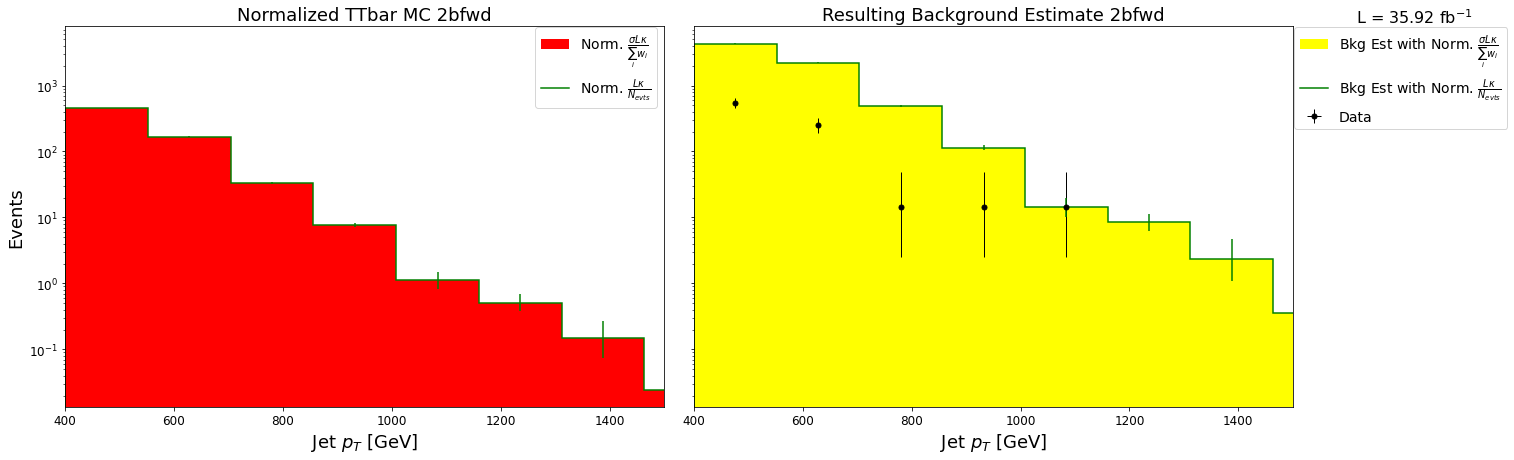

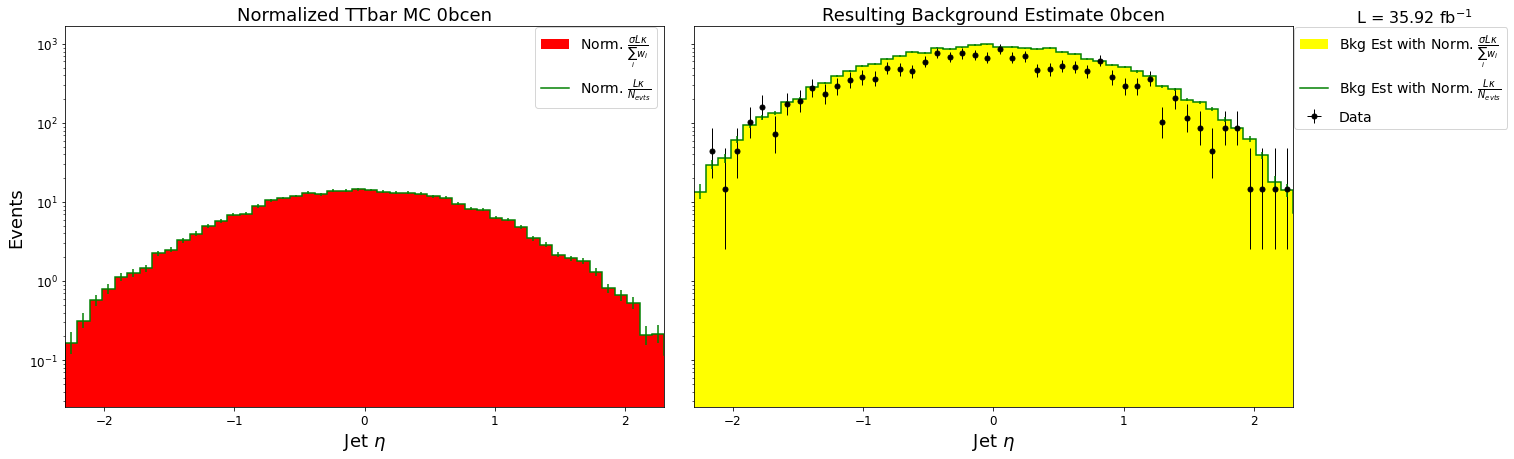

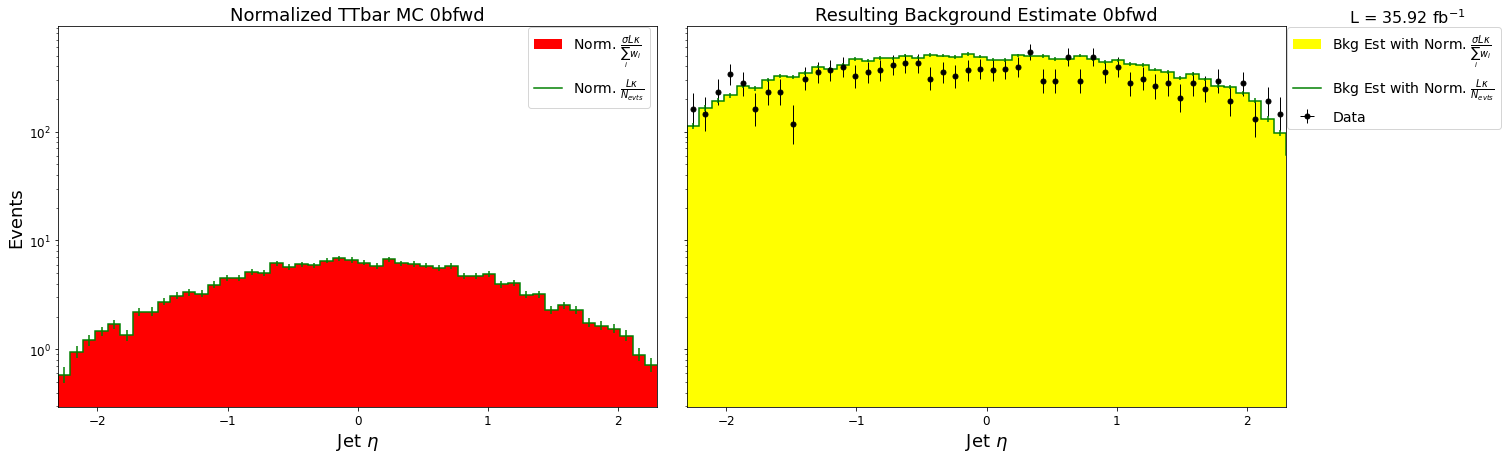

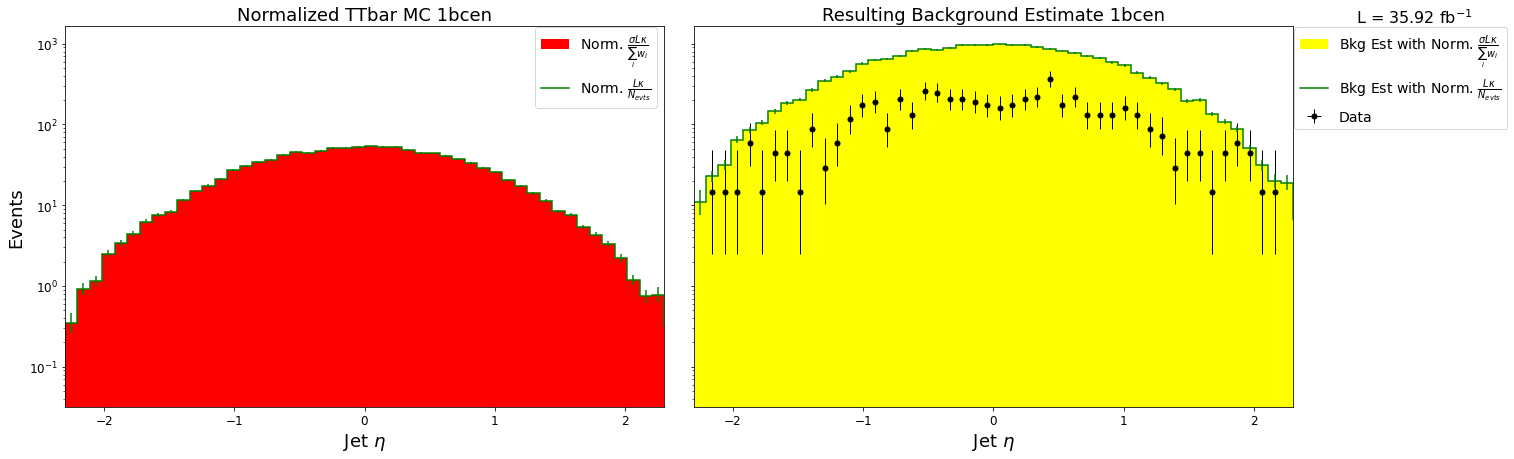

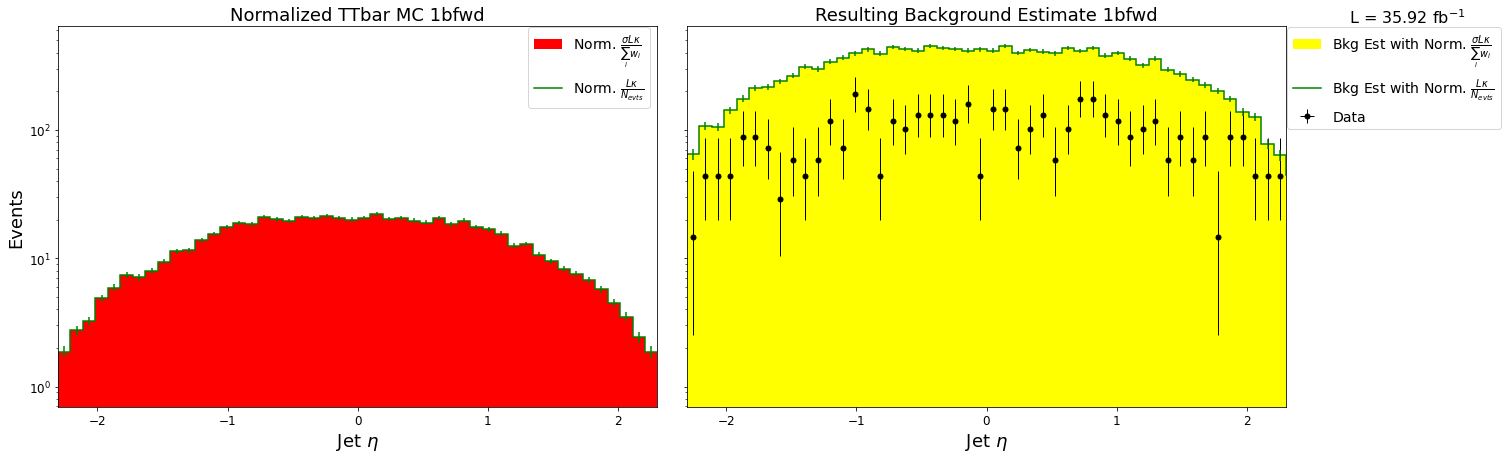

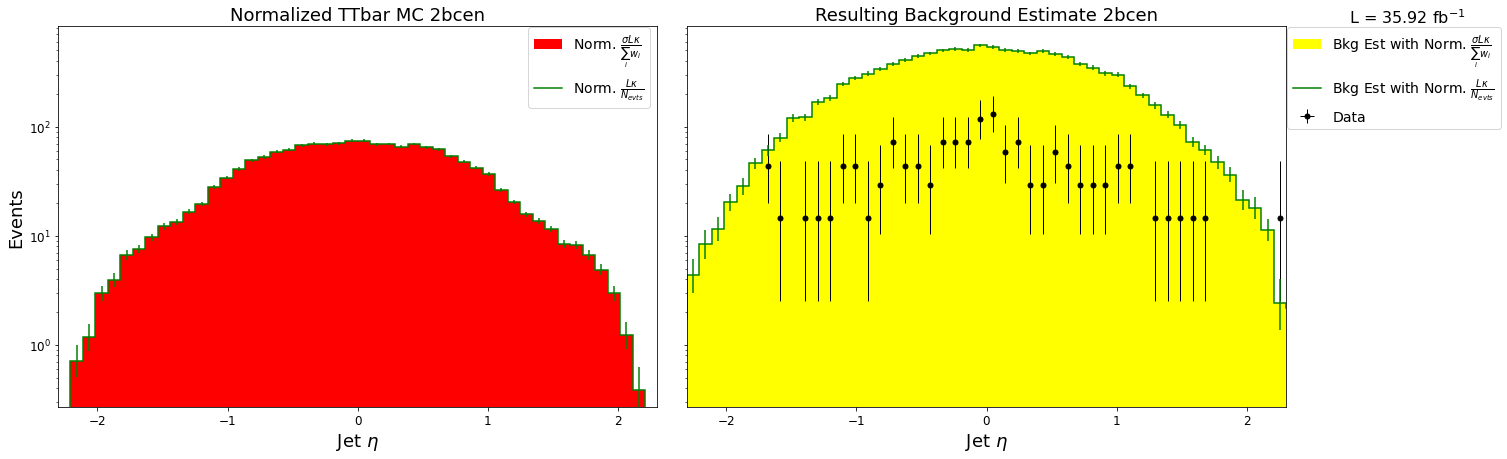

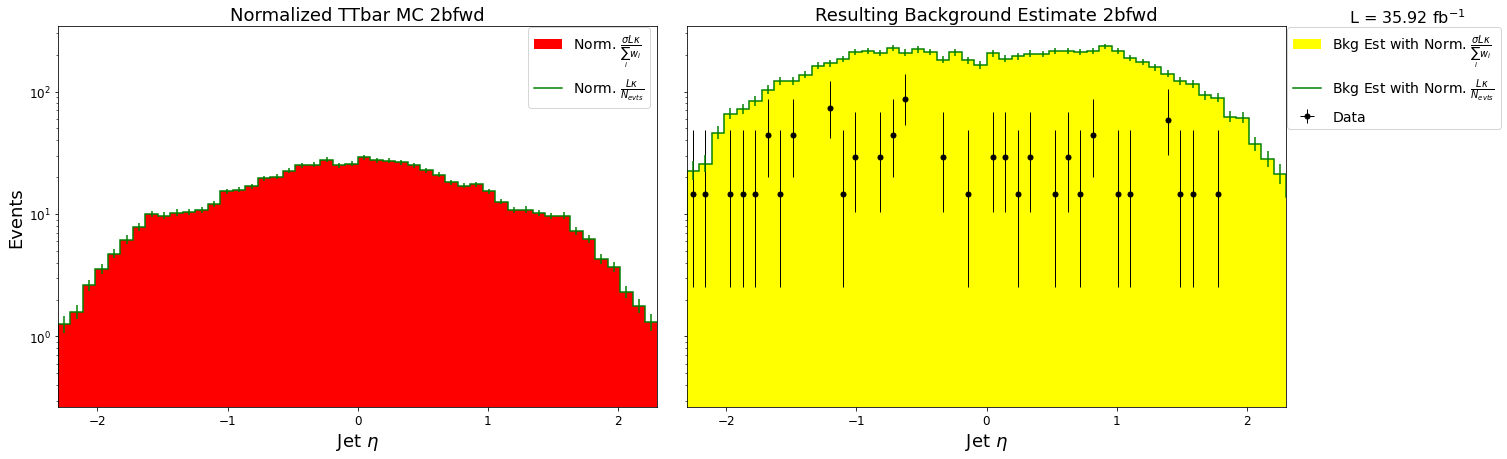

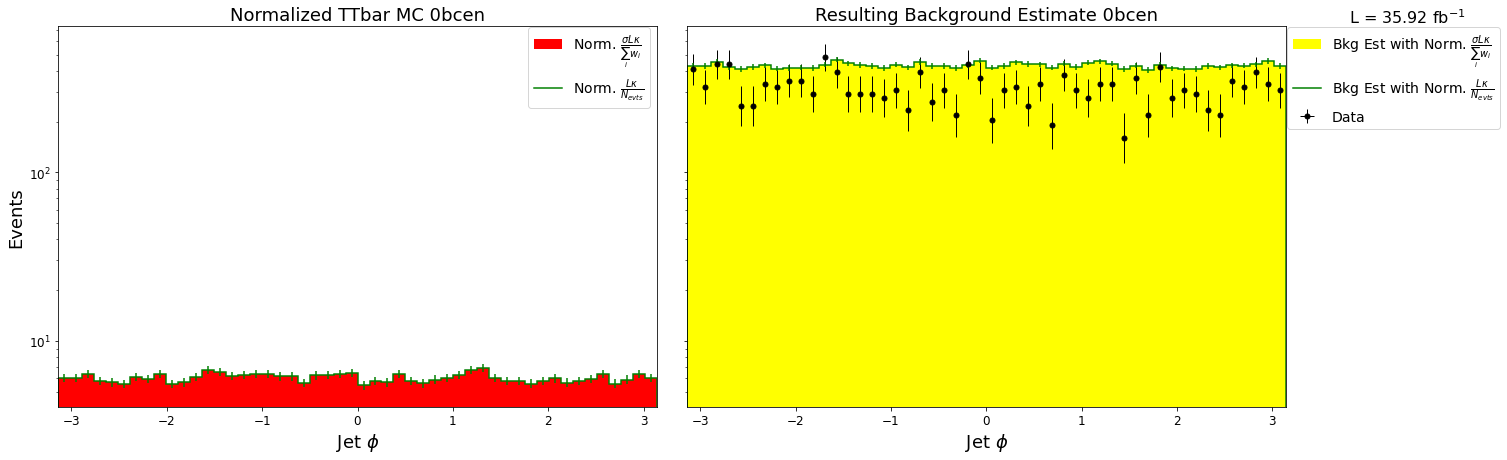

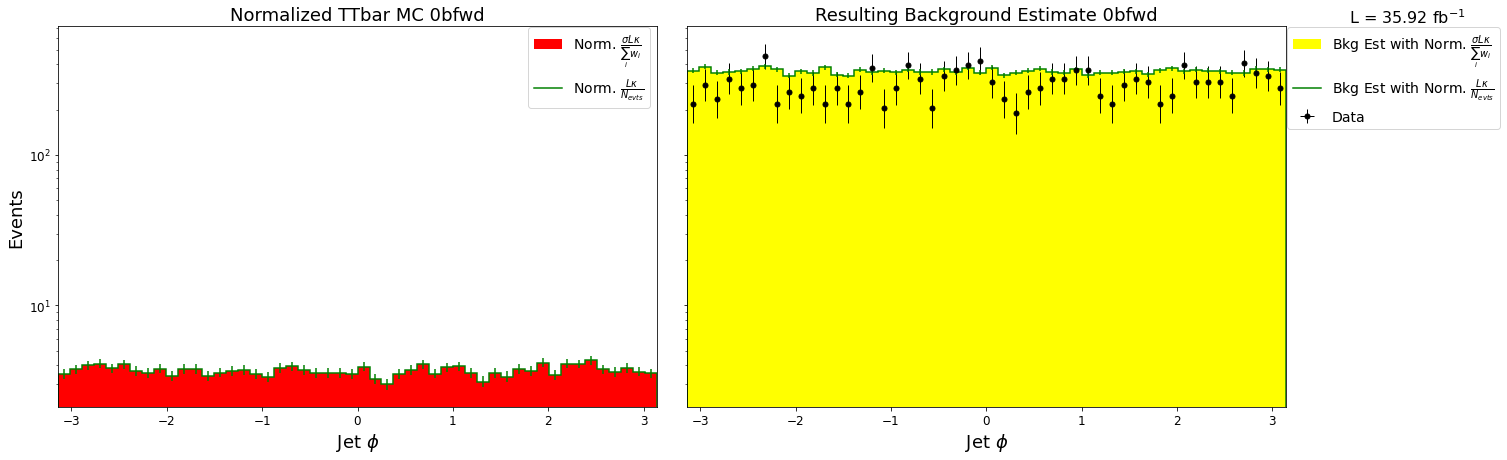

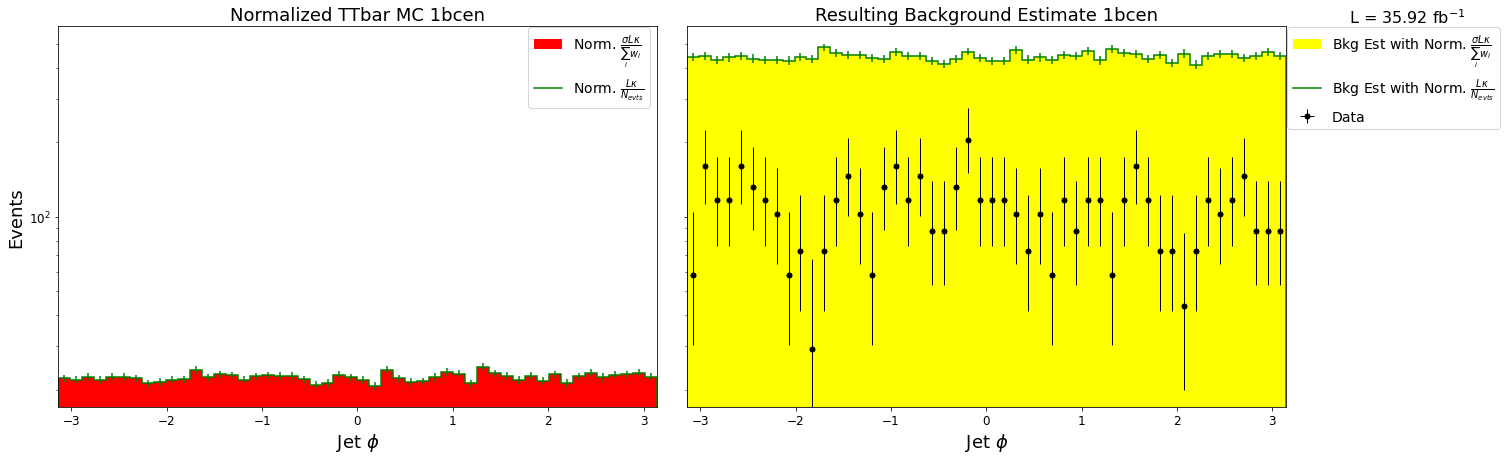

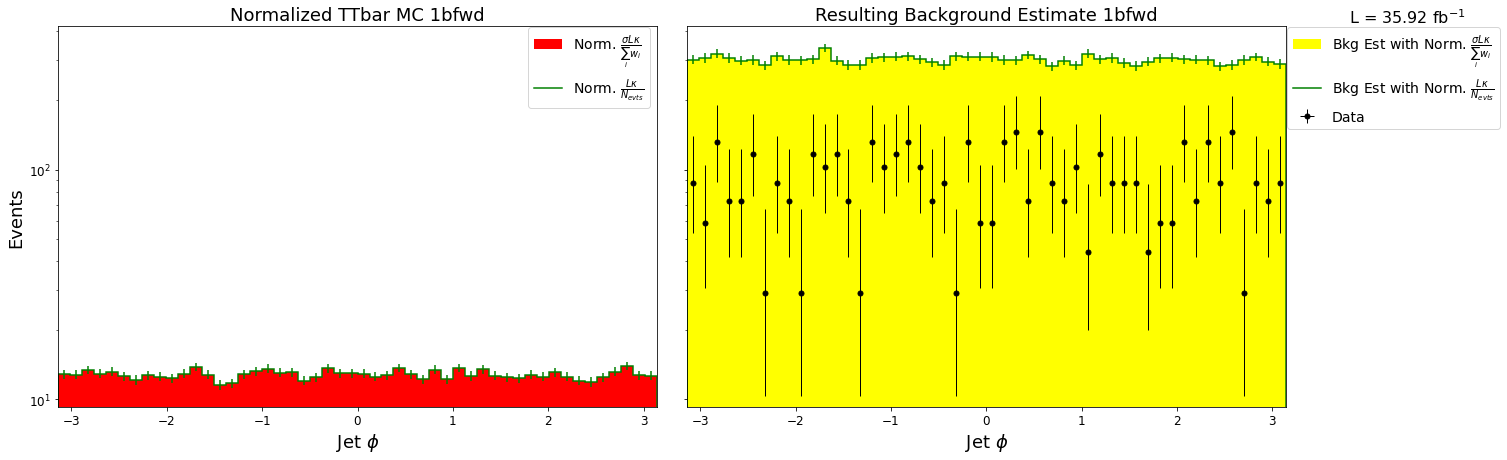

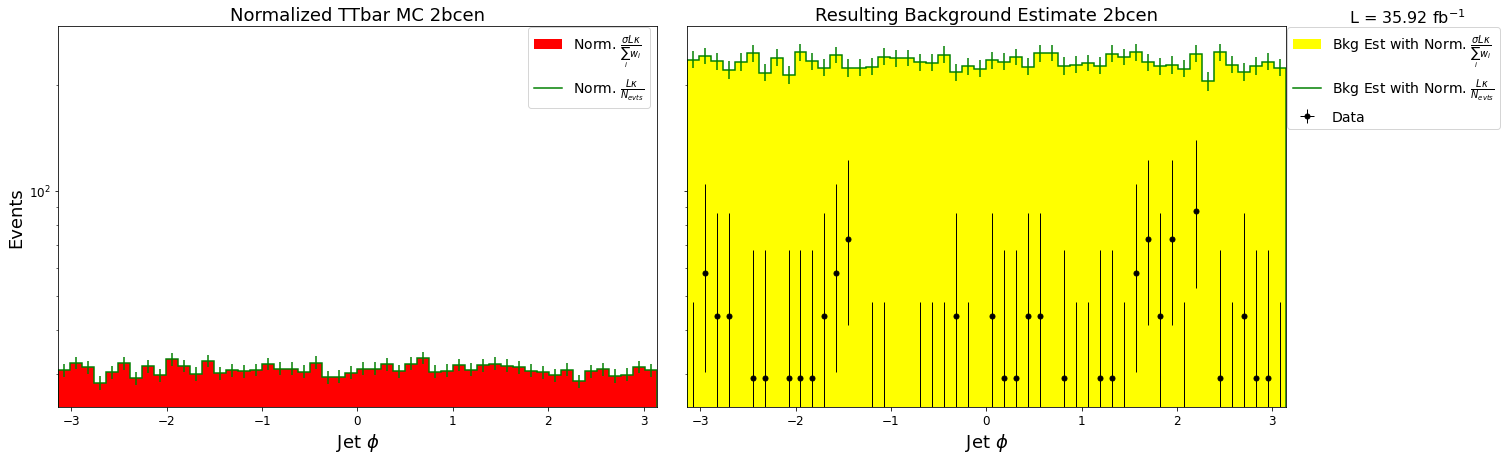

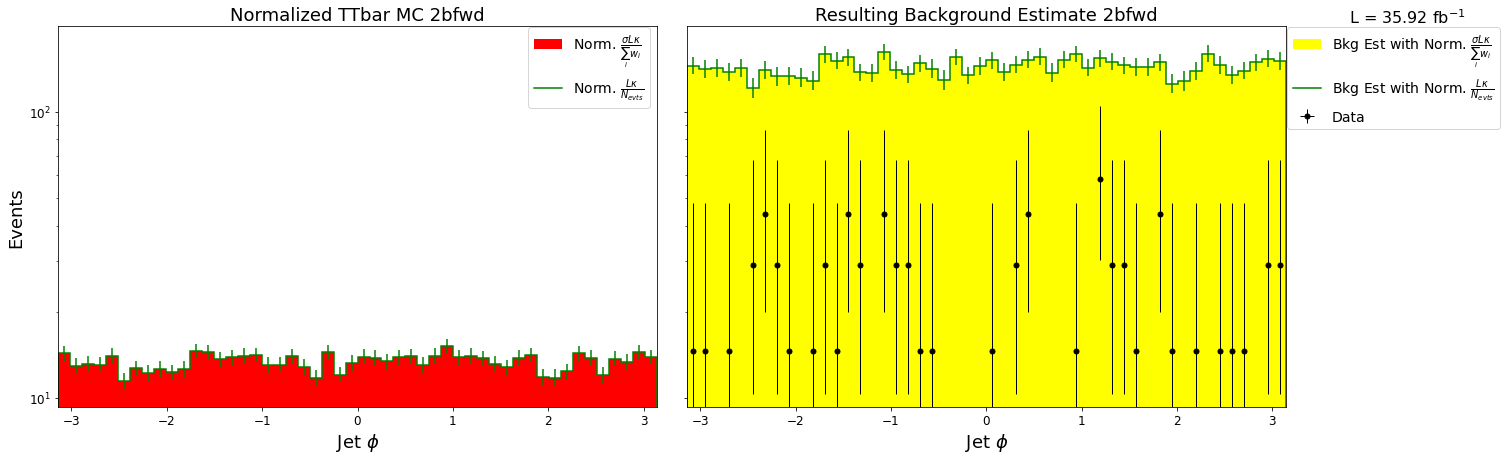

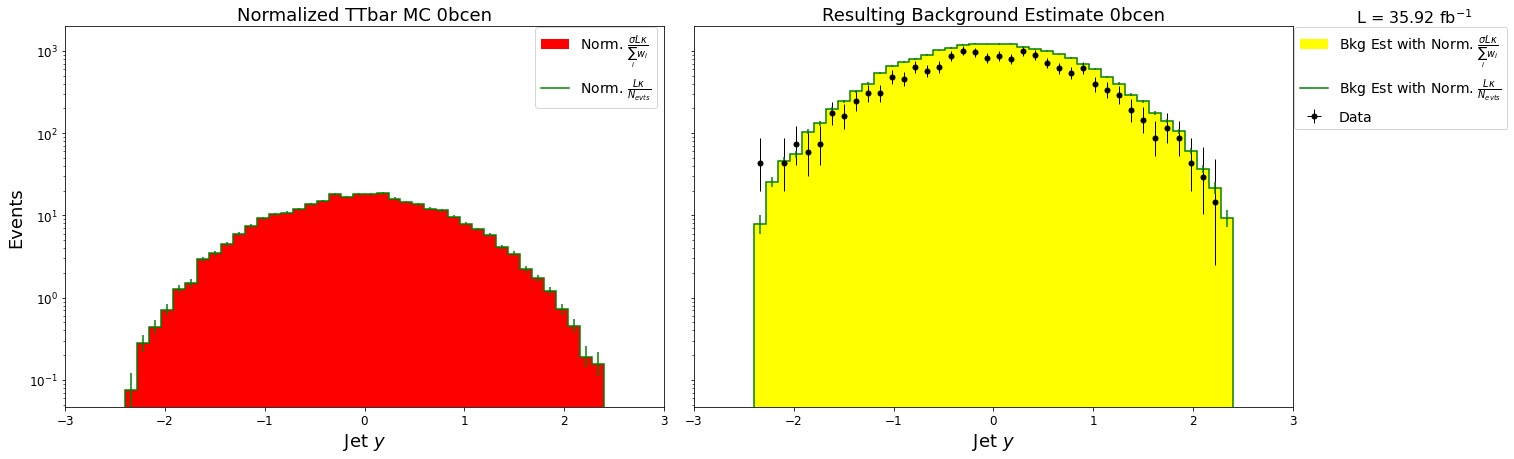

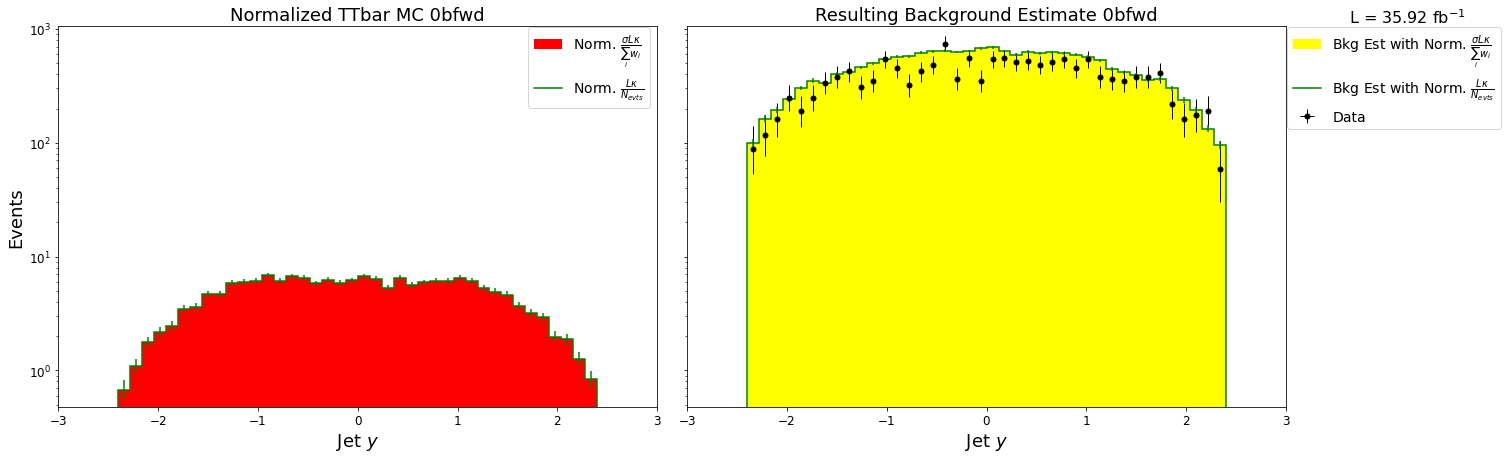

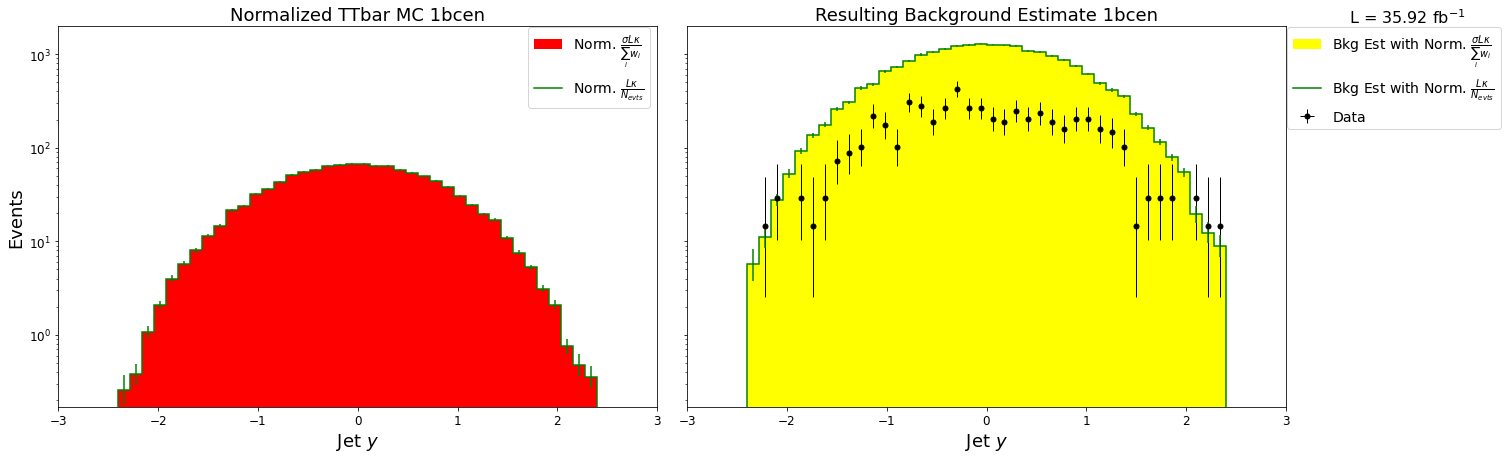

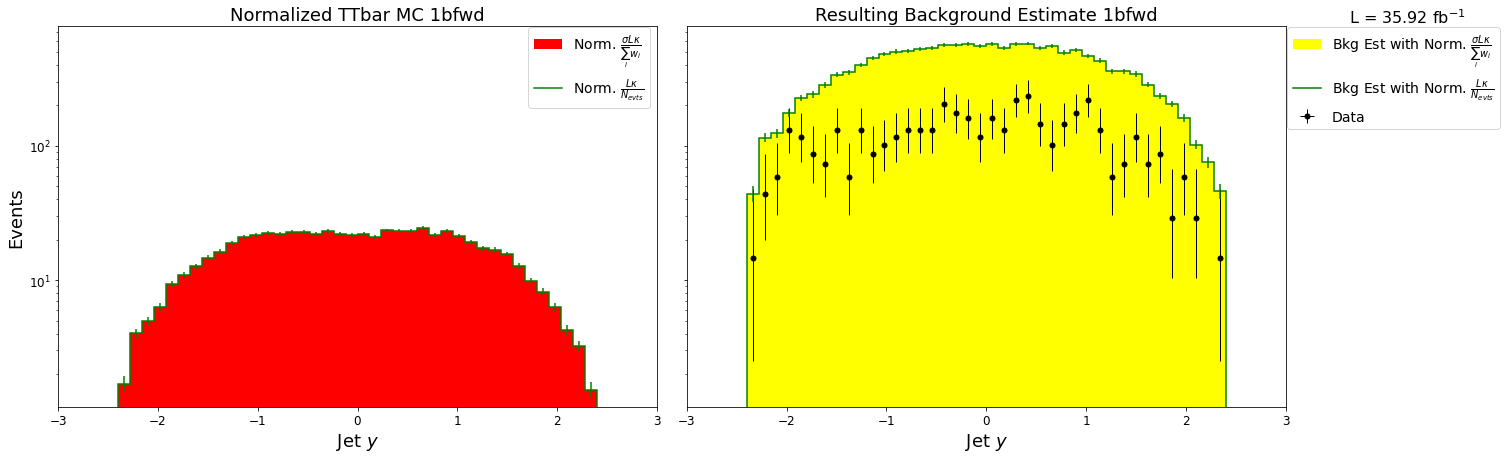

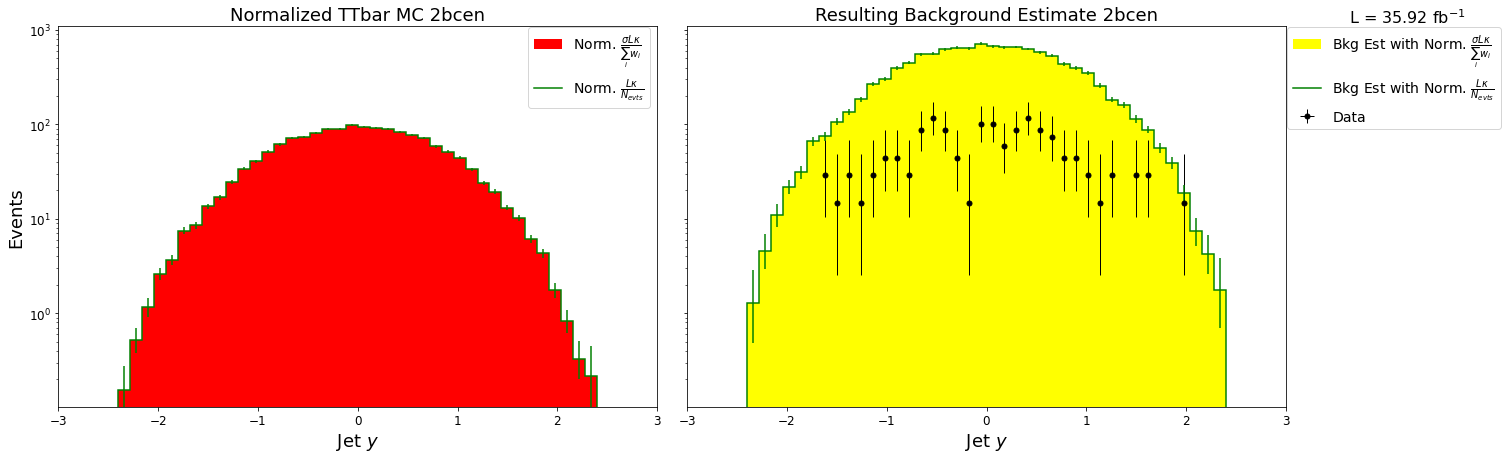

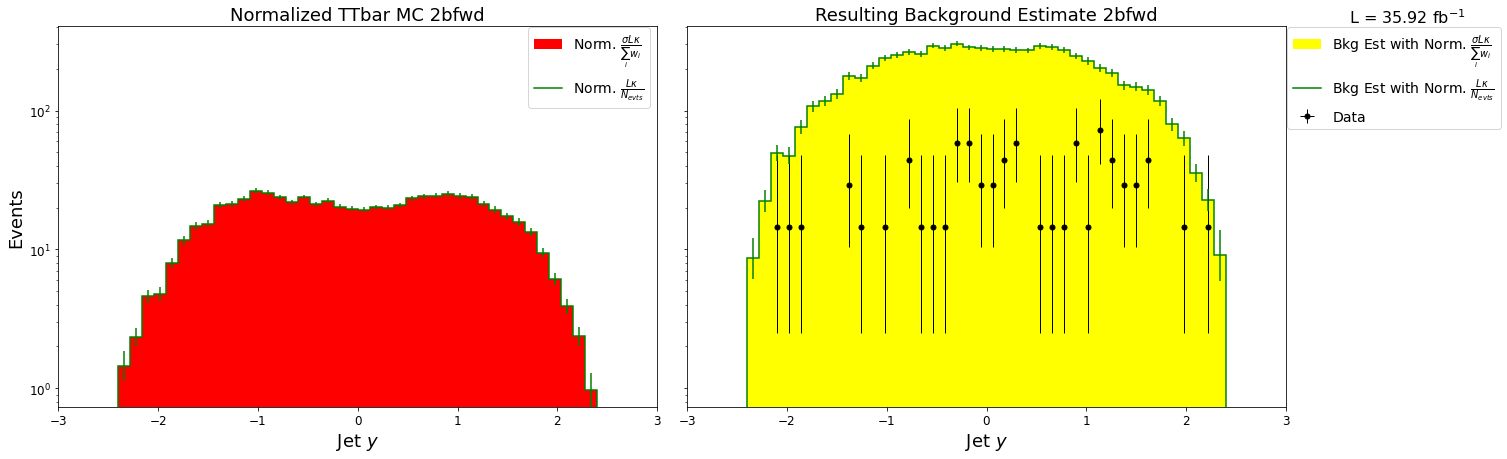

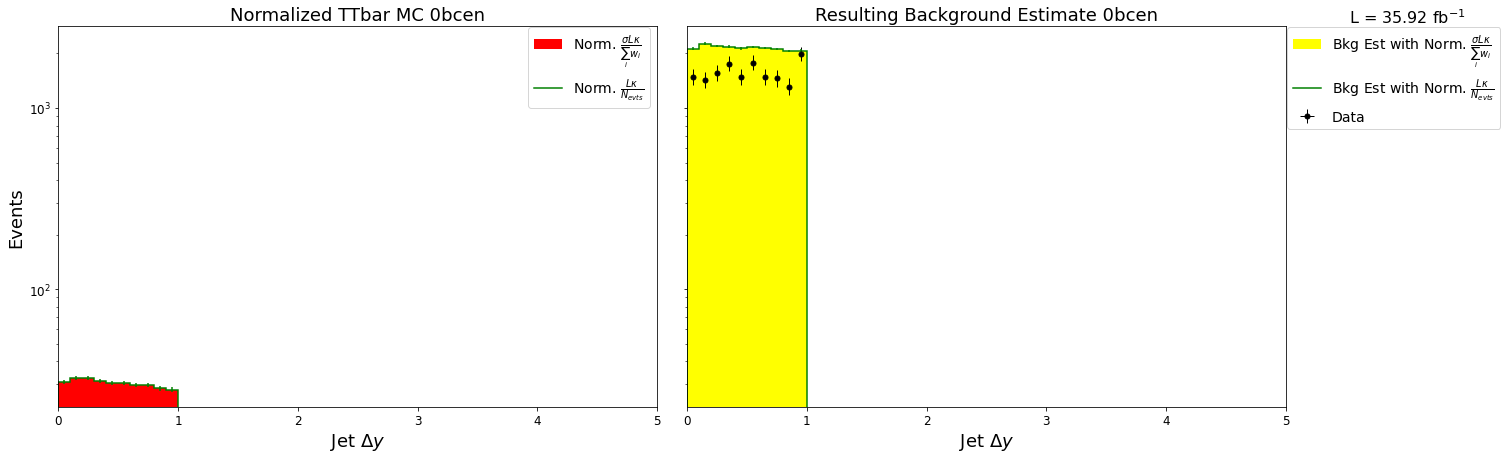

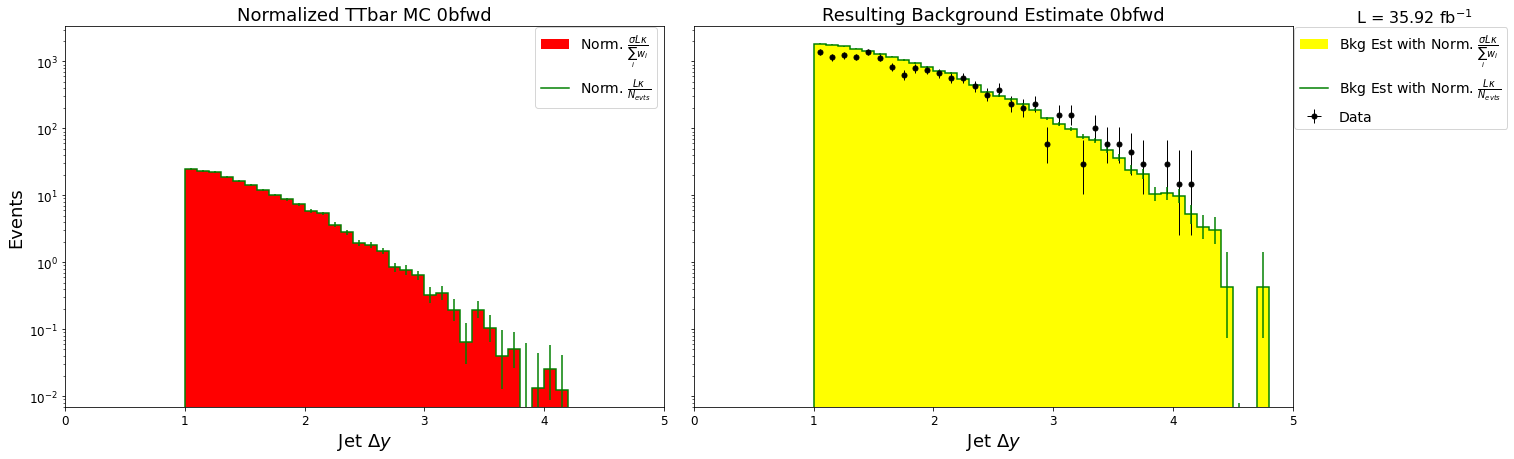

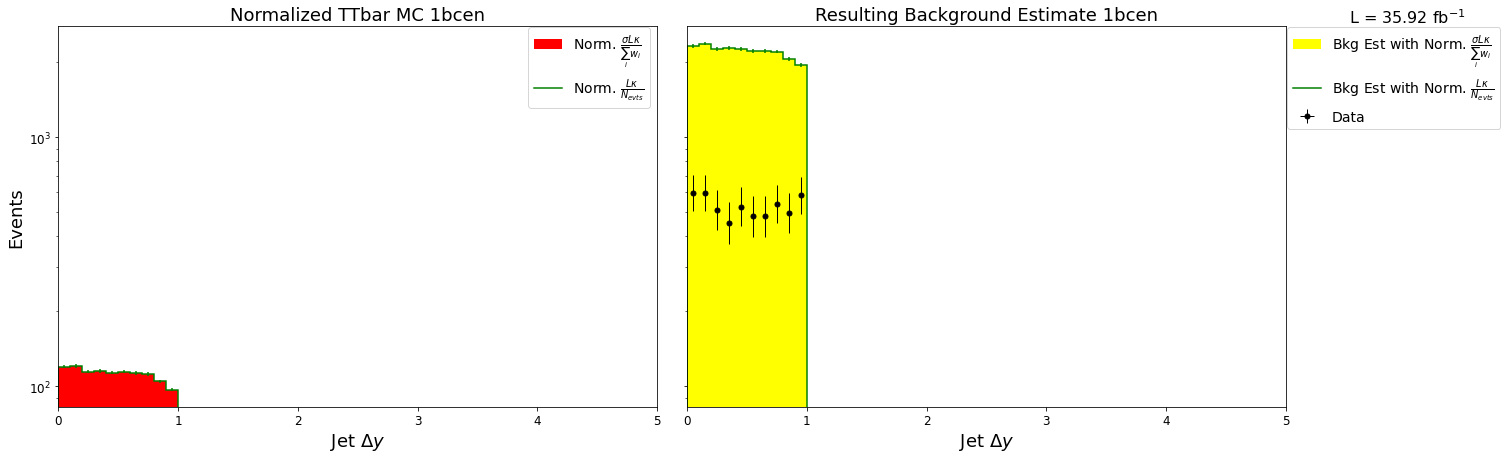

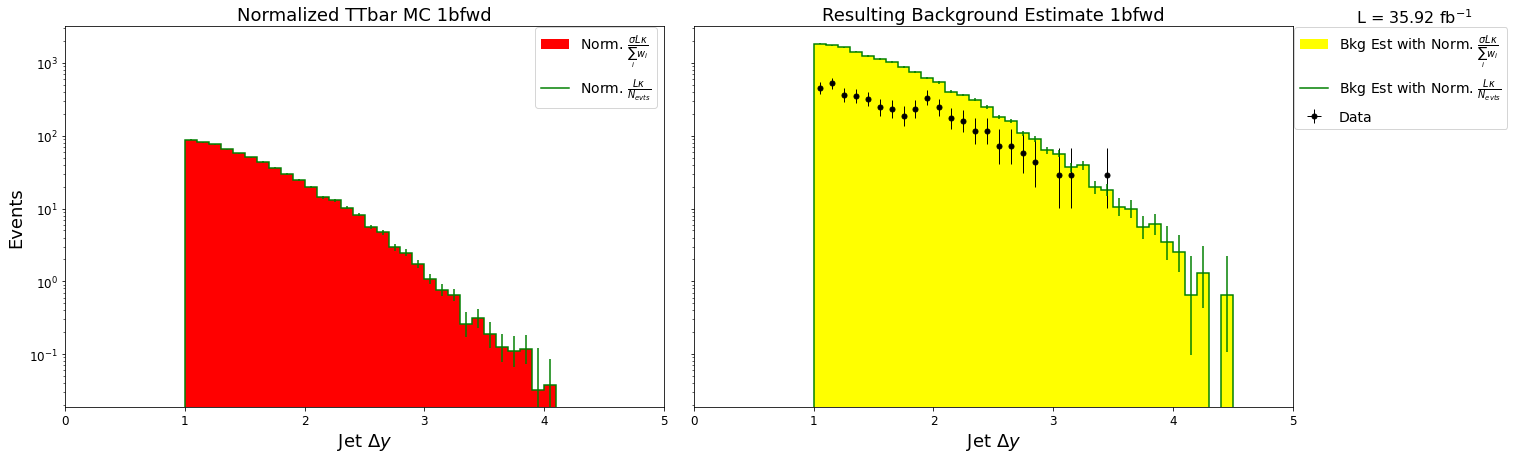

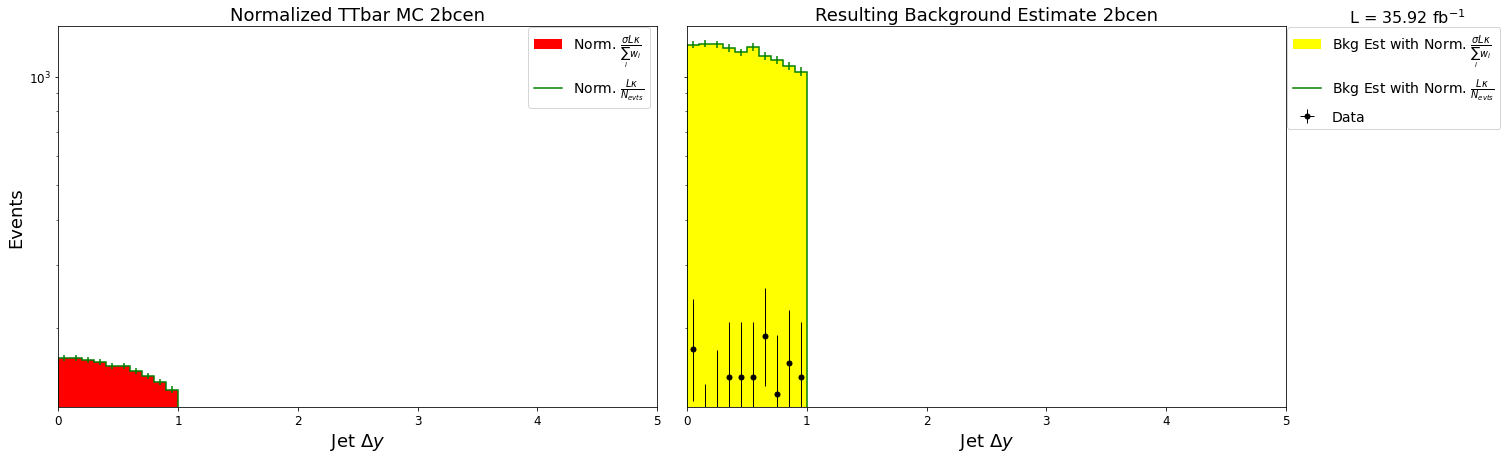

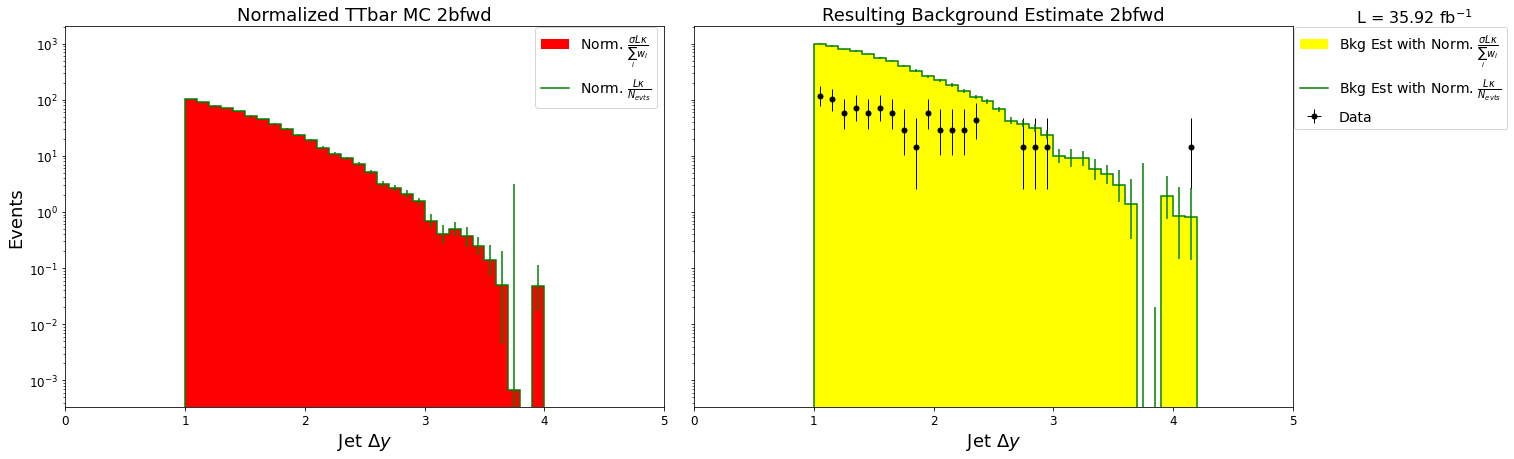

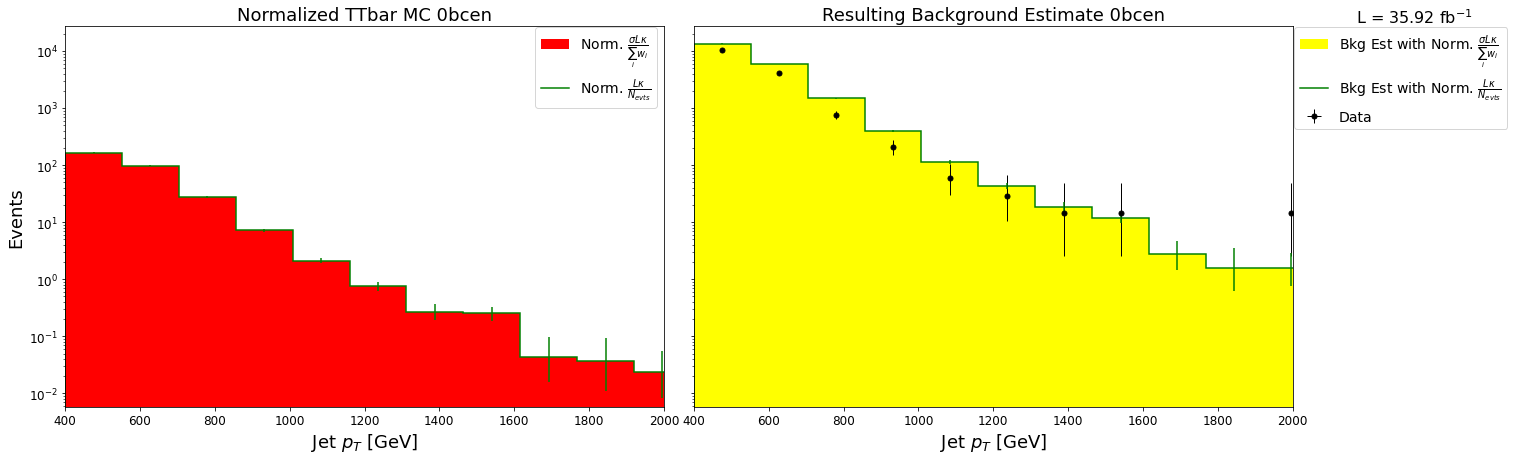

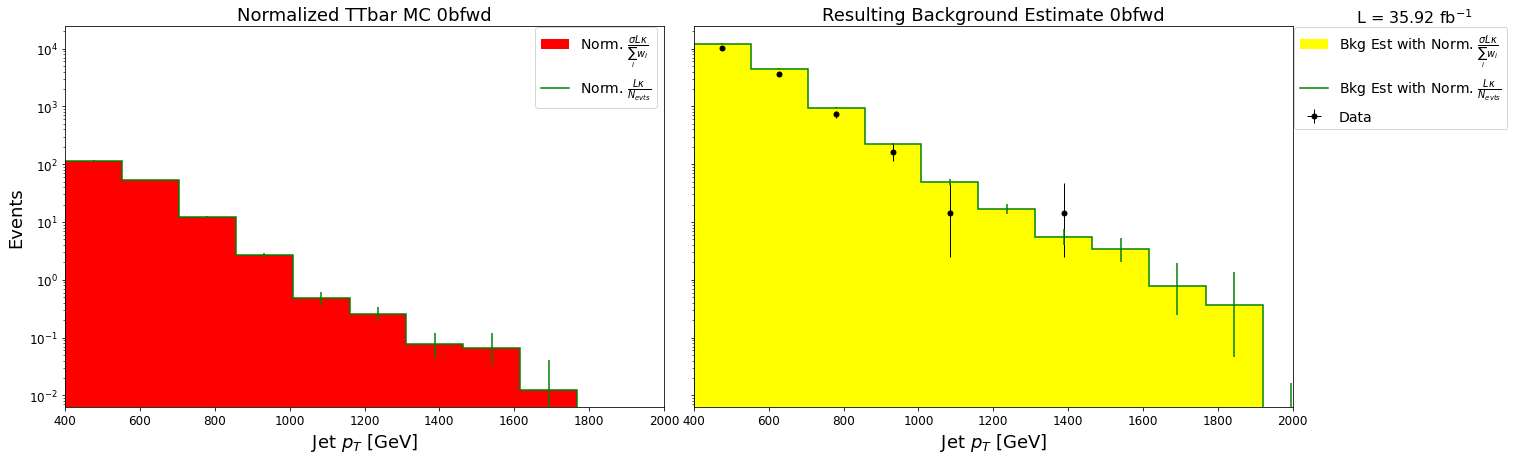

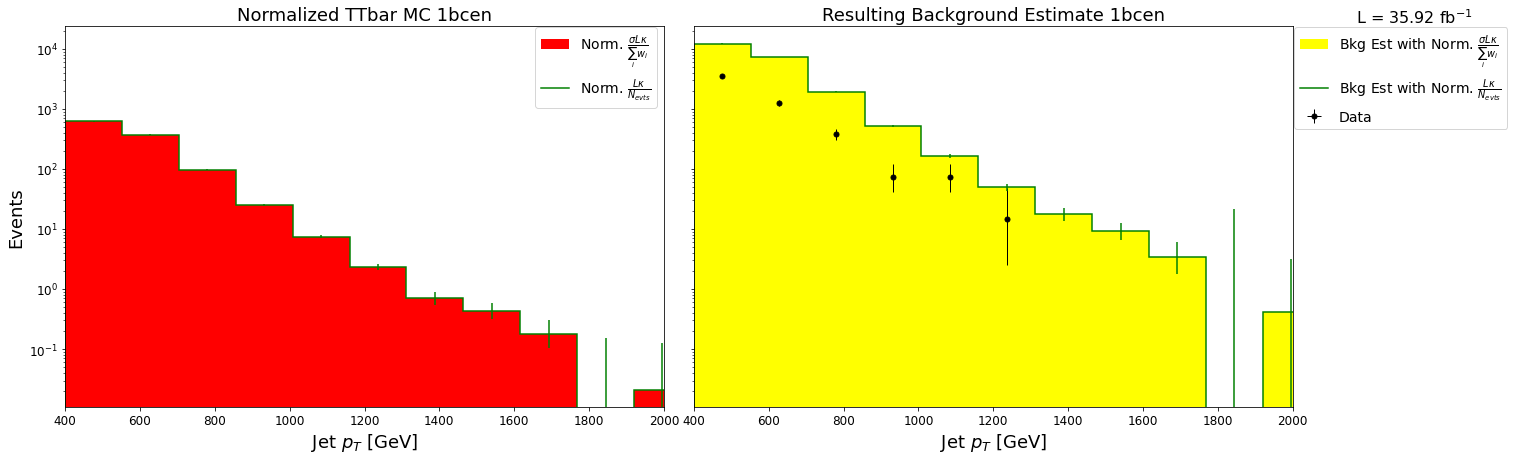

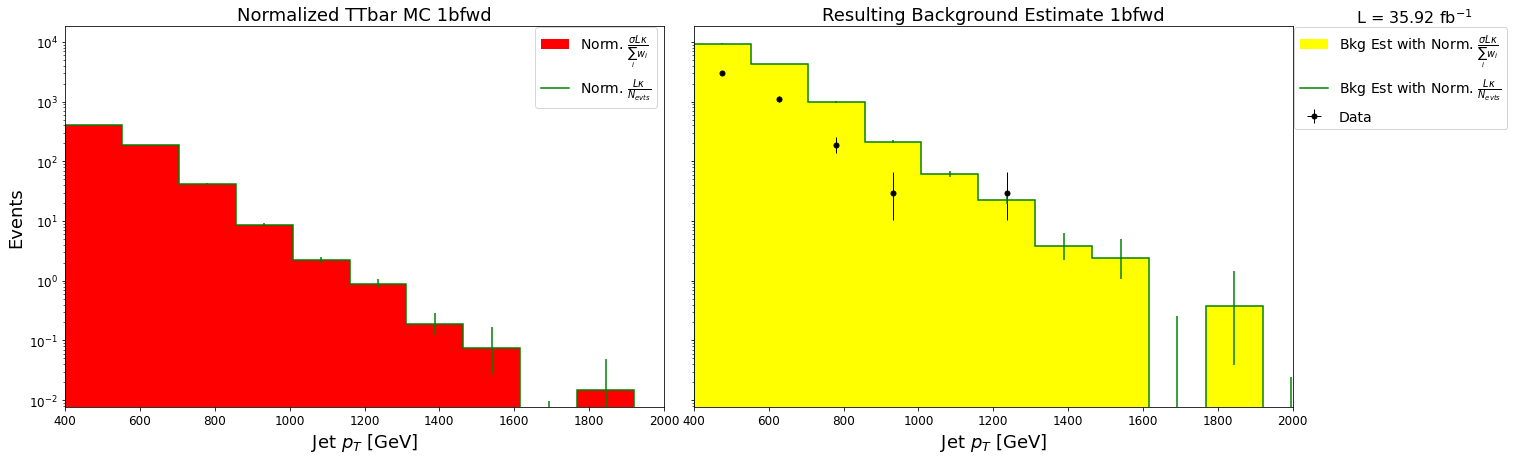

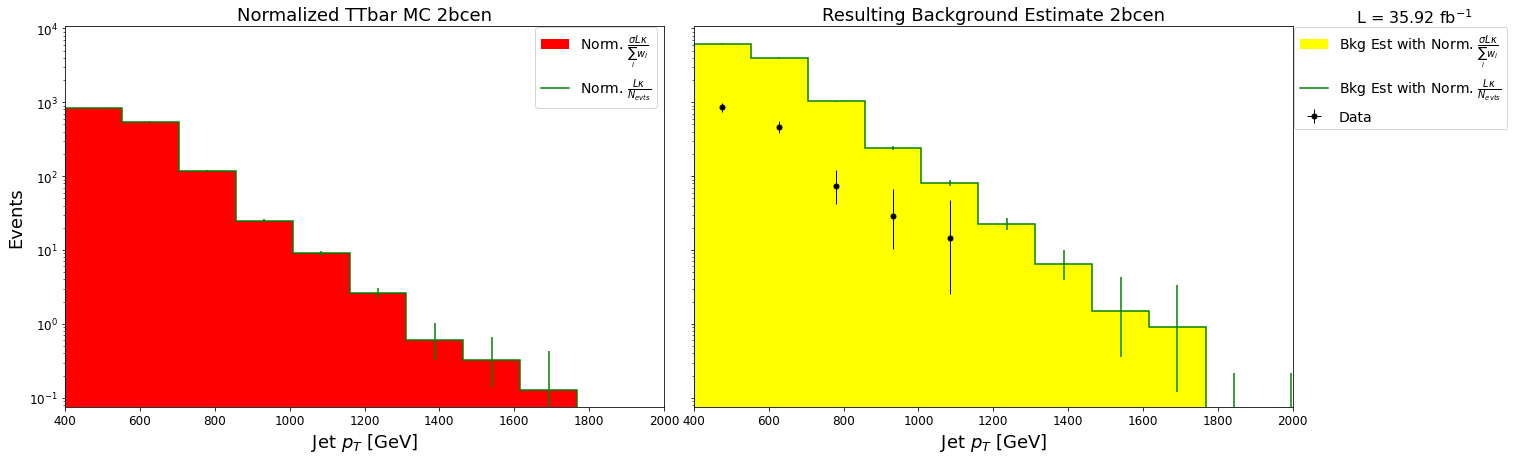

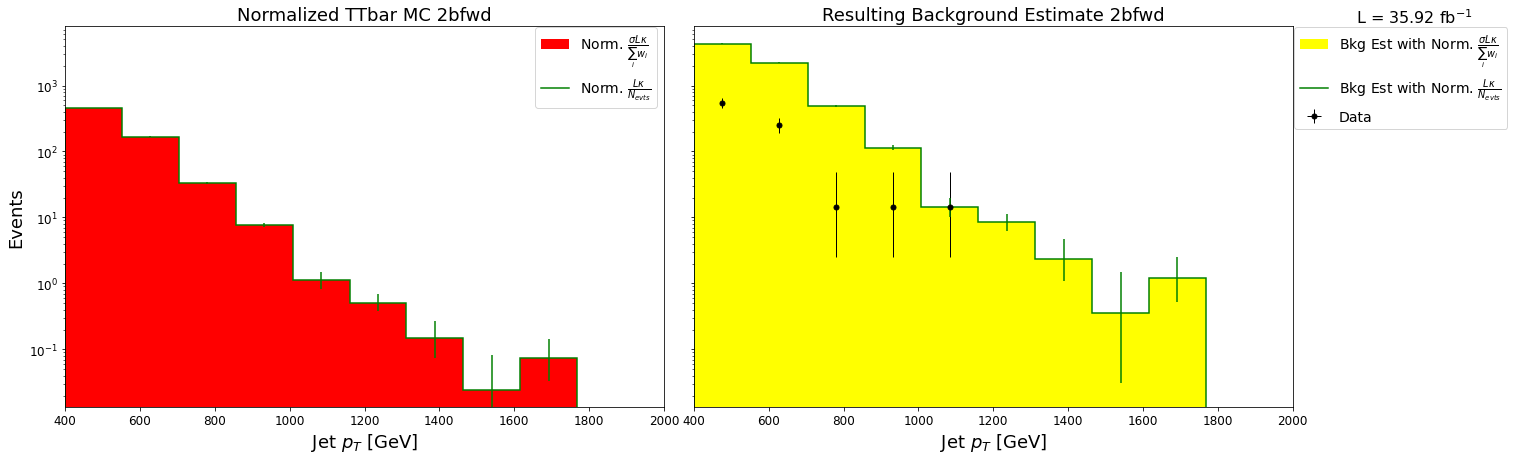

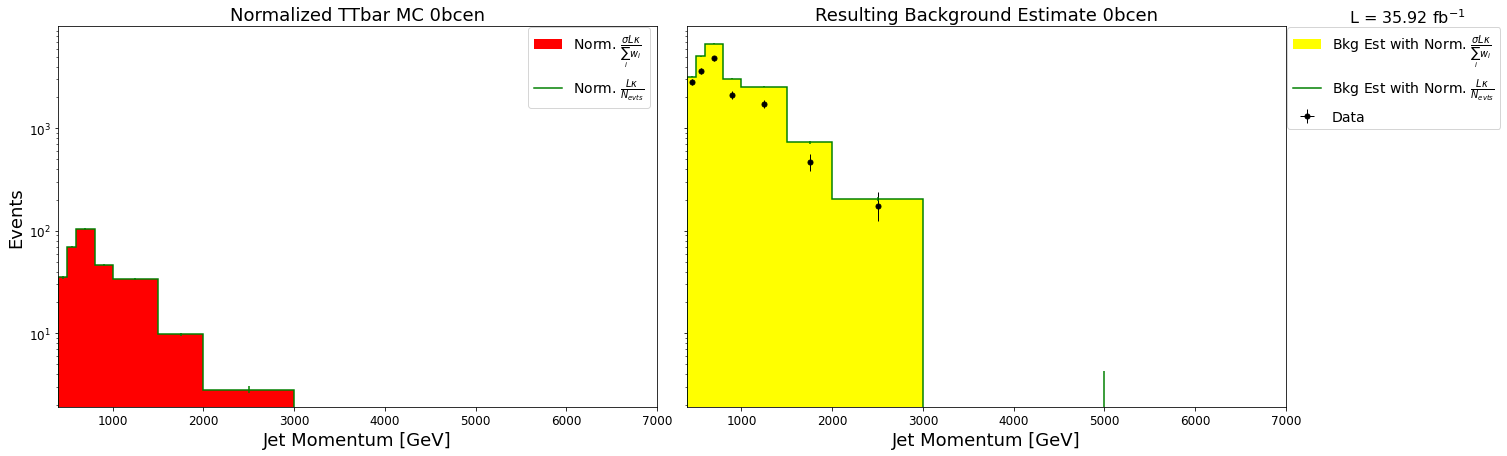

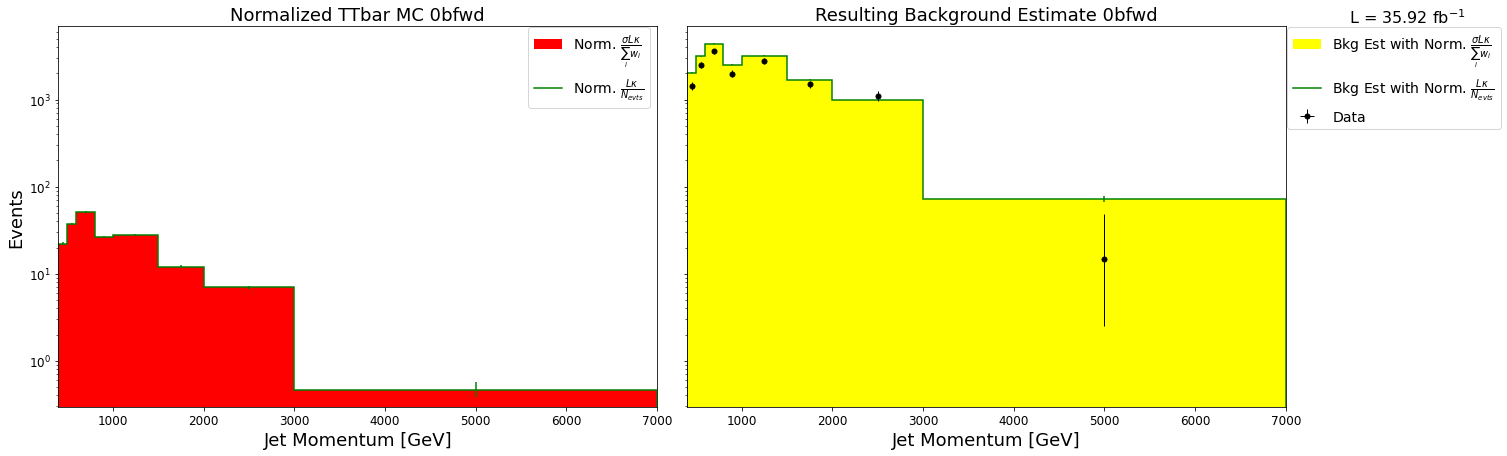

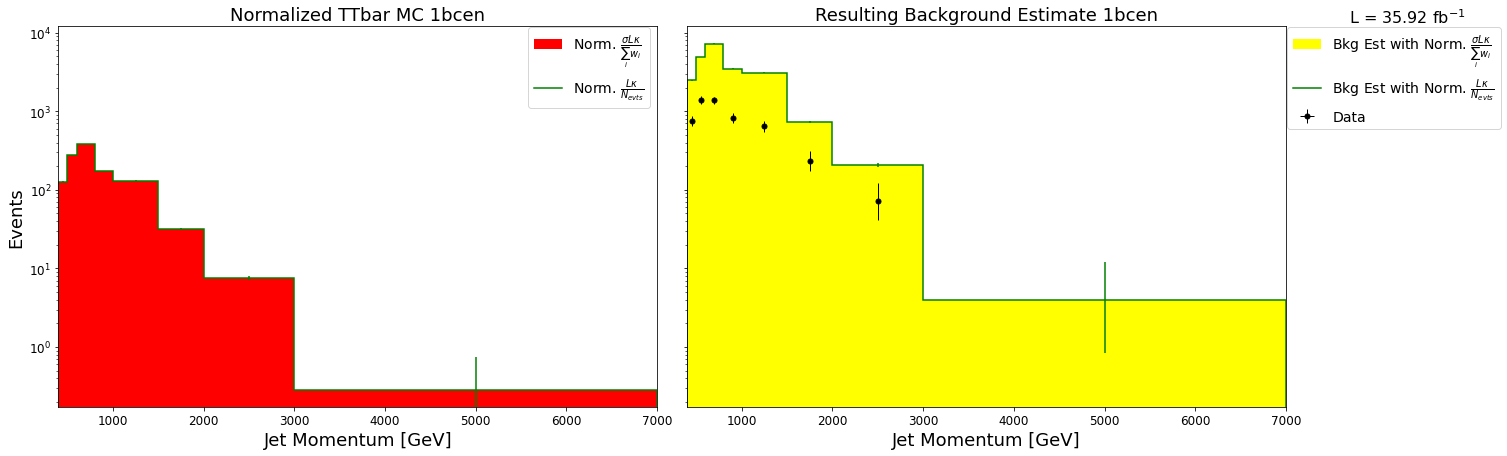

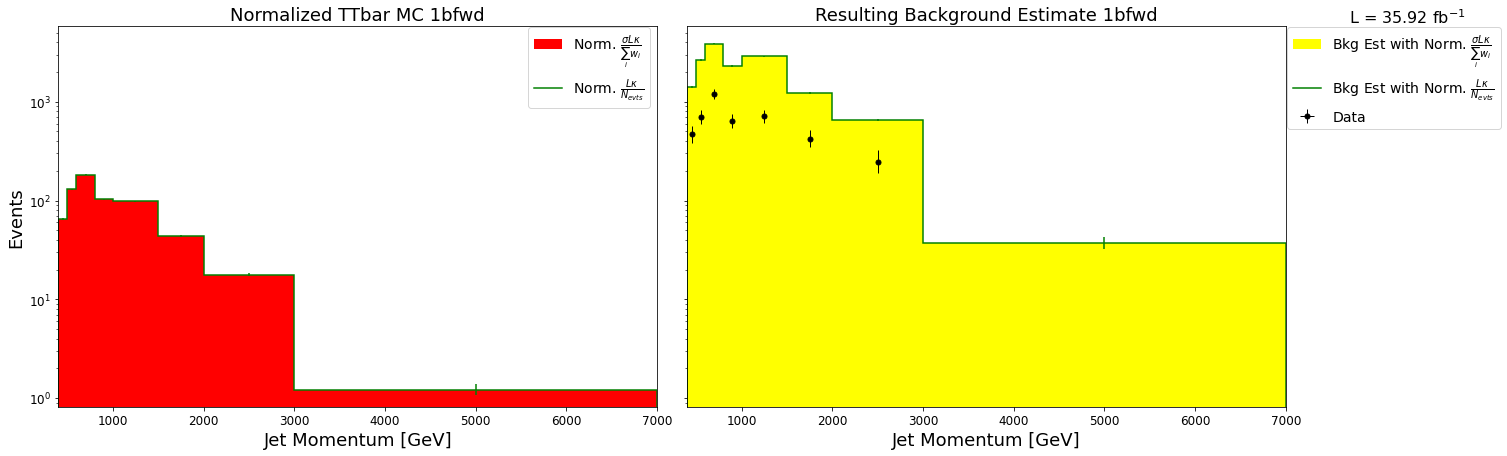

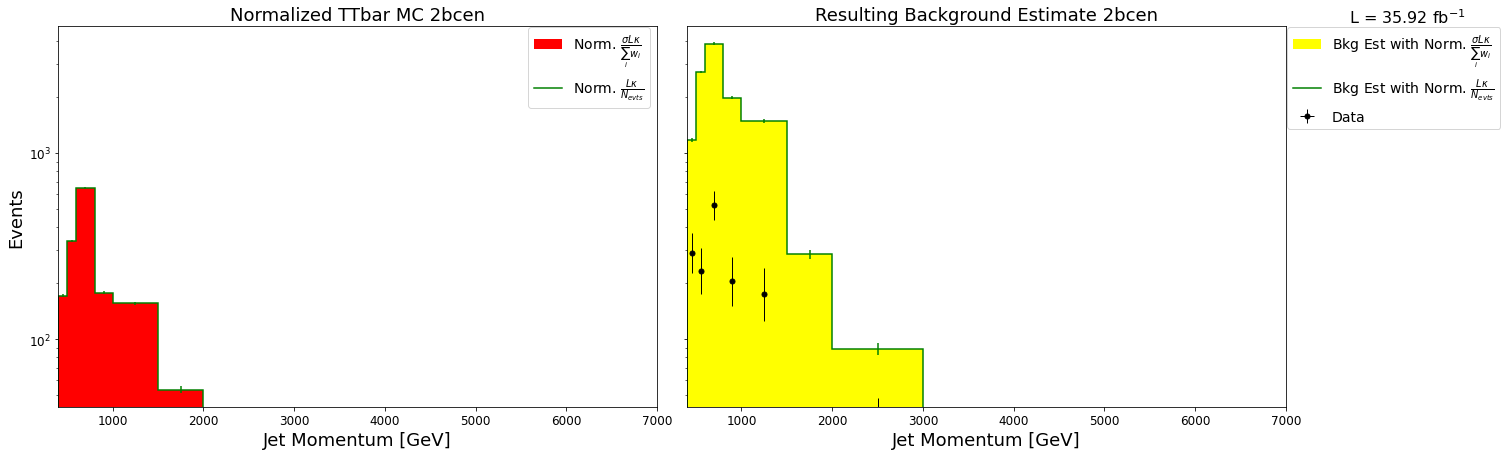

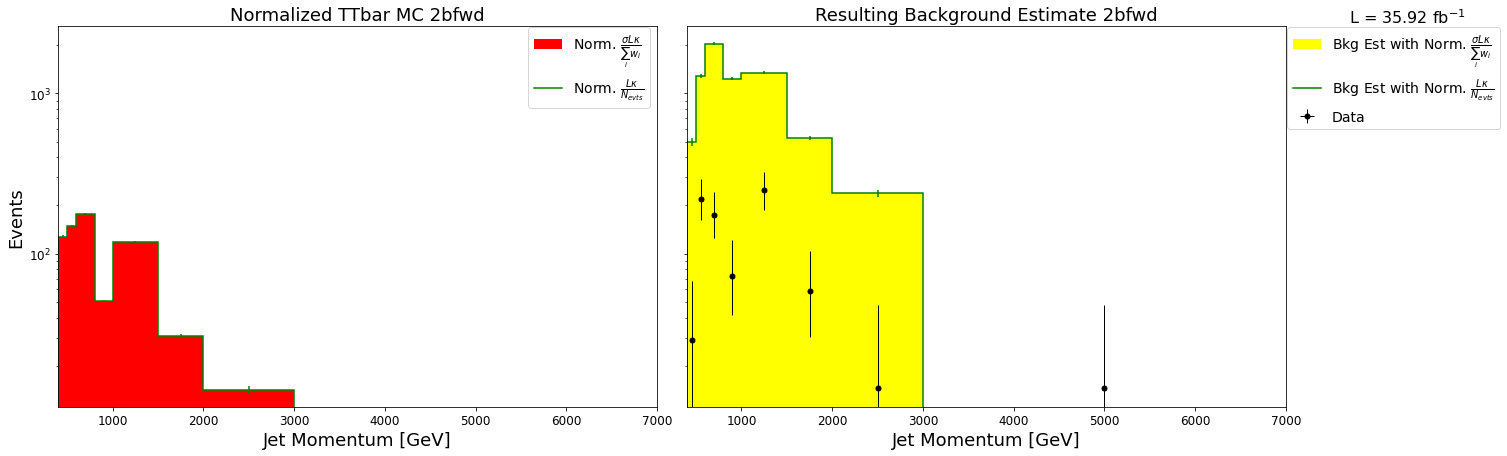

In [21]:
""" ---------- Comparing Background Estimate to Unweighted Data (One Histogram) ---------- """
""" --------------- Background: t tagged probe jet from data weighted by mistag --------------- """
""" --------------- Data: Unweighted Data from the Signal Region (2t tag region) -------------- """

SaveDirectory_temp = maindirectory + '/BkgEstimate/TemporaryDirectory/TTbarNormalizationComparisonPlots/' + btagDir + yearDir + APVDir + UncDir + TopPtDir # split histograms into subdirectories
DoesDirectoryExist(SaveDirectory_temp) # no need to create the directory several times if it exists already

#---- list_of_hists = ('ttbarmass', 'jetpt', 'jeteta', 'jetphi', 'jety', 'jetdy', 'probept', 'probep'))----#
for name in list_of_hists:
    for b_y in list_of_bcats:
        plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })
        fig, (ax, bax) = plt.subplots(
            nrows=1,
            ncols=2,
            figsize=(22,7),
            sharex=True,
            sharey=True
        )
        fig.subplots_adjust(hspace=0.7, wspace=0.05)
        
        #---- Define Histograms from Coffea Outputs ----# 

        # -- Mistag Weighted TTbar MC L/N -- #
        TTbar_2016_wgt_ForPlot = TTbar_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- Mistag Weighted TTbar MC L/sumw2 -- #
        TTbar_2016_wgt_sumw2_ForPlot = TTbar_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- Mistag Weighted TTbar MC xs*L/N -- #
        TTbar_2016_wgt_xs_ForPlot = TTbar_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- Mistag Weighted TTbar MC xs*L/sumw2 -- #
        TTbar_2016_wgt_xs_sumw2_ForPlot = TTbar_weighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- Mistag Weighted TTbar MC L/N -- #
        TTbar_2016_wgt = TTbar_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- Mistag Weighted TTbar MC L/sumw2 -- #
        TTbar_2016_wgt_sumw2 = TTbar_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- Mistag Weighted TTbar MC xs*L/N -- #
        TTbar_2016_wgt_xs = TTbar_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- Mistag Weighted TTbar MC xs*L/sumw2 -- #
        TTbar_2016_wgt_xs_sumw2 = TTbar_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- For Observed Signal -- #
        Data_hist_unwgt = JetHT2016_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])

        # -- For Mass Modified Background Estimate (Non-Top Multi-Jets; NTMJ)-- # 4 for each ttbar normalization scheme
        Data_hist_modmass_wgt1 = JetHT2016_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])
        Data_hist_modmass_wgt2 = JetHT2016_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])
        Data_hist_modmass_wgt3 = JetHT2016_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])
        Data_hist_modmass_wgt4 = JetHT2016_weighted[name].integrate('anacat', 'pret'+b_y).integrate('dataset', JetHT2016_unwgt_str[12:])

        # -- SM TTbar MC in Signal Region (Contributes to the Background) L/N -- #
        TTbar_unwgt = TTbar_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- SM TTbar MC in Signal Region (Contributes to the Background) L/sumw2 -- #
        TTbar_unwgt_sumw2 = TTbar_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- SM TTbar MC in Signal Region (Contributes to the Background) xs*L/N -- #
        TTbar_unwgt_xs = TTbar_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])
        
        # -- SM TTbar MC in Signal Region (Contributes to the Background) xs*L/sumw2 -- #
        TTbar_unwgt_xs_sumw2 = TTbar_unweighted[name].integrate('anacat', '2t'+b_y).integrate('dataset', TTbar_unwgt_str[12:])

        # =============================================================================================================================== #
        
        # ---- TTbar MC Scaling ---- #
        TTbar_2016_wgt_ForPlot.scale(ttbar2016_sf_wgt*toptag_kf)
        TTbar_2016_wgt_sumw2_ForPlot.scale(ttbar2016_sf_sumw2_wgt*toptag_kf)
        TTbar_2016_wgt_xs_ForPlot.scale(ttbar2016_sf_xs_wgt*toptag_kf)
        TTbar_2016_wgt_xs_sumw2_ForPlot.scale(ttbar2016_sf_xs_sumw2_wgt*toptag_kf)
        
        # ---- Prepare to be included in background ---- #
        TTbar_unwgt.scale(ttbar2016_sf*toptag_kf)
        TTbar_unwgt_sumw2.scale(ttbar2016_sf_sumw2*toptag_kf)
        TTbar_unwgt_xs.scale(ttbar2016_sf_xs*toptag_kf)
        TTbar_unwgt_xs_sumw2.scale(ttbar2016_sf_xs_sumw2*toptag_kf)
        
        # ---- Prepare to Subtract double counting from background ---- #
        TTbar_2016_wgt.scale(-ttbar2016_sf_wgt*toptag_kf)
        TTbar_2016_wgt_sumw2.scale(-ttbar2016_sf_sumw2_wgt*toptag_kf)
        TTbar_2016_wgt_xs.scale(-ttbar2016_sf_xs_wgt*toptag_kf)
        TTbar_2016_wgt_xs_sumw2.scale(-ttbar2016_sf_xs_sumw2_wgt*toptag_kf)
        
        # ---- Data Scaling ---- #
        Data_hist_unwgt.scale(Nevts2016_sf) # Observed Signal is only scaled up to Luminosity
        Data_hist_modmass_wgt1.scale(Nevts2016_sf_wgt)
        Data_hist_modmass_wgt2.scale(Nevts2016_sf_wgt)
        Data_hist_modmass_wgt3.scale(Nevts2016_sf_wgt)
        Data_hist_modmass_wgt4.scale(Nevts2016_sf_wgt)

        Data_hist_modmass_wgt1.add(TTbar_unwgt) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        Data_hist_modmass_wgt2.add(TTbar_unwgt_sumw2) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        Data_hist_modmass_wgt3.add(TTbar_unwgt_xs) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        Data_hist_modmass_wgt4.add(TTbar_unwgt_xs_sumw2) # Include signal region SM ttbar contribution to NTMJ for the complete background estimate
        #(mistagged ttbar events need to be removed)#
        
        Data_hist_modmass_wgt1.add(TTbar_2016_wgt) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        Data_hist_modmass_wgt2.add(TTbar_2016_wgt_sumw2) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        Data_hist_modmass_wgt3.add(TTbar_2016_wgt_xs) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        Data_hist_modmass_wgt4.add(TTbar_2016_wgt_xs_sumw2) # ttbar contamination subtraction from background estimate 
        #(removes doubly counted ttbar events included in previous line)#
        
        # =============================================================================================================================== #
        
        # ---- Legend Lables for Plotting with All DM Mediator Signals ---- #
        legend_labels_ttbar = {'labels':[r'Norm. $\frac{\sigma L\kappa}{\sum_iw_i}$', 
                                         # r'Norm. $\frac{\sigma L\kappa}{N_{\mathit{evts}}}$',
                                         r'Norm. $\frac{L\kappa}{N_{\mathit{evts}}}$'
                                         # r'Norm. $\frac{L\kappa}{\sum_iw_i}$'
                                         ], 
                             'ncol':1, 
                             'loc': 'upper right', 'bbox_to_anchor': (1.0, 1.017)}
                         # 'fontsize': 'xx-small'}
            
        legend_labels_bkg = {'labels':[r'Bkg Est with Norm. $\frac{\sigma L\kappa}{\sum_iw_i}$', 
                                       # r'Bkg Est with Norm. $\frac{\sigma L\kappa}{N_{\mathit{evts}}}$',
                                       r'Bkg Est with Norm. $\frac{L\kappa}{N_{\mathit{evts}}}$',
                                       # r'Bkg Est with Norm. $\frac{L\kappa}{\sum_iw_i}$',
                                       r'Data'
                                         ], 
                             'ncol':1, 
                             'loc': 'upper right', 'bbox_to_anchor': (1.37, 1.017)}
        
        # # ---- Shrink current axis by 10% ---- 3
        # box = ax.get_position()
        # ax.set_position([box.x0, box.y0, box.width * 0.9, box.height * 0.9])

        # ---- Plot Histograms (Comment out whatever you don't want included in the figure and/or root file) ---- #
        TTbarPlot1 = hist.plot1d(TTbar_2016_wgt_xs_sumw2_ForPlot, ax=ax, clear=True,
                    fill_opts={'color': 'red'},
                    error_opts=stack_error_opts)
        # TTbarPlot2 = hist.plot1d(TTbar_2016_wgt_xs_ForPlot, ax=ax, clear=False,
        #             line_opts={'color': 'blue'},
        #             error_opts=stack_error_opts)
        TTbarPlot3 = hist.plot1d(TTbar_2016_wgt_ForPlot, ax=ax, clear=False,
                    line_opts={'color': 'green'},
                    error_opts=stack_error_opts, legend_opts=legend_labels_ttbar)
        # TTbarPlot4 = hist.plot1d(TTbar_2016_wgt_sumw2_ForPlot, ax=ax, clear=False,
        #             line_opts={'color': 'purple'},
        #             error_opts=stack_error_opts, legend_opts=legend_labels_ttbar)
        
        Observed = hist.plot1d(Data_hist_unwgt, ax=bax, clear=True,
                     error_opts=data_err_opts)
        BkgPlot1 = hist.plot1d(Data_hist_modmass_wgt4, ax=bax, clear=False,
                    fill_opts={'color': 'yellow'},
                    error_opts=stack_error_opts)
        # BkgPlot2 = hist.plot1d(Data_hist_modmass_wgt3, ax=bax, clear=False,
        #             line_opts={'color': 'blue'},
        #             error_opts=stack_error_opts)
        BkgPlot3 = hist.plot1d(Data_hist_modmass_wgt1, ax=bax, clear=False,
                    line_opts={'color': 'green'},
                    error_opts=stack_error_opts, legend_opts=legend_labels_bkg)
        # BkgPlot4 = hist.plot1d(Data_hist_modmass_wgt2, ax=bax, clear=False,
        #             line_opts={'color': 'purple'},
        #             error_opts=stack_error_opts, legend_opts=legend_labels_bkg)
        
        


        plt.ylim(bottom = .1, top = 10**4)

        ax.set_yscale('log')
        ax.autoscale('y')
        ax.autoscale('x')#, tight=True) # doesn't look like its working...
        ax.set_ylabel('Events')
        # ax.set_xlabel(None)
        ax.set_title('Normalized TTbar MC ' + b_y)
        bax.set_title('Resulting Background Estimate ' + b_y)
        bax.set_ylabel('')
        
        if 'ttbarmass' in name:
            ax.set_xlim(800,5000)
        elif 'jetpt' in name:
            ax.set_xlim(400,1500)
        elif 'jeteta' in name:
            ax.set_xlim(-2.3,2.3)
        elif 'jetphi' in name:
            ax.set_xlim(-3.14, 3.14)
        elif 'jety' in name:
            ax.set_xlim(-3., 3.)
        elif 'jetdy' in name:
            ax.set_xlim(0., 5.)
        elif 'probept' in name:
            ax.set_xlim(400., 2000.)   
        elif 'probep' in name:
            ax.set_xlim(400., 7000.)  
        
        #rax.set_xlim(0,500)

        #---- Labeling ----#
        Lint = str(Lum2016*.001) # Integrated Luminosity
        lumi = plt.text(2.35, 1.05, "L = " + Lint[:6] + " fb$^{-1}$",
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )

        # filename = 'BkgEst_' + name + '_ContaminationCorrection_ModMass' + Unc + TopPt + '_' + b_y + '.png'
        filename_temp = name + Unc + TopPt + '_' + b_y + '_NoBR.png'
        # plt.savefig(SaveDirectory_temp+filename_temp, bbox_inches="tight")
        # print('\n' + SaveDirectory + filename)
# root_output.close()